<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 120px; margin-top: 50px; margin-bottom: 50px;" align="left">

<div style="font-family: Arial, sans-serif;">
   <div style="text-align: center; font-size: 28px; font-weight: bold; color: #929591; margin: 20px 0;">
      Machine Learning Handout | To Grant or Not to Grant
   </div>

   <div style="text-align: center; font-size: 17px; font-weight: bold;">
      Master in Data Science and Advanced Analytics
   </div>
    <br>

   <div style="text-align: center;">
      <b>Group 32</b>
   </div>

   <div style="text-align: center;">Filipa Pereira, 20240509</div>
   <div style="text-align: center;">Klimentina Gilevska, 20240747</div>
   <div style="text-align: center;">Maria Assunção, 20211605</div>
   <div style="text-align: center;">Rita Matos, 20211642</div>
   <div style="text-align: center;">Rita Wang, 20240551</div>
   <div style="text-align: center;">Sven Goerdes, 20240503</div>
   <br>



## Table of Contents
1. [Introduction](#introduction)
2. [Importing Libraries and Dataset](#importing-libraries-and-dataset)
    - 2.1 [Import Necessary Libraries](#import-necessary-libraries)
    - 2.2 [Load the Dataset](#load-the-dataset)
3. [Data Exploration](#data-exploration)
    - 3.1 [Understanding the Dataset Structure](#understanding-the-dataset-structure)
    - 3.2 [Descriptive Statistics](#descriptive-statistics)
    - 3.3 [Checking Incoherencies](#checking-for-incoherencies)
    - 3.4 [Data Type](#data-type)
4. [Data Splitting](#data-splitting)
5. [Data Cleaning and Pre-processing](#data-cleaning-and-pre-processing)
    - 5.1 [Handling Missing Values](#handling-missing-values)
    - 5.2 [Outlier Detection and Treatment](#outlier-detection-and-treatment)
    - 5.3 [Dealing with Categorical Variables](#dealing-with-categorical-variables)
    - 5.4 [Feature Engineering](#feature-engineering)
        - 5.4.1 [Feature Creation](#feature-creation)
        - 5.4.2 [Feature Transformation](#feature-transformation)
    - 5.5 [Data Scaling and Normalization](#data-scaling-and-normalization)
6. [Feature Selection](#feature-selection)
    - 6.1 [Feature Importance Analysis](#feature-importance-analysis)
    - 6.2 [Correlation Matrix](#correlation-matrix)
    - 6.3 [Dimensionality Reduction Techniques](#dimensionality-reduction-techniques)
    - 6.4 [Final Feature Selection](#final-feature-selection)
7. [Model Building](#model-building)
    - 7.1 [Problem Type Identification](#problem-type-identification)
    - 7.2 [Algorithm Selection](#algorithm-selection)
    - 7.3 [Model Training](#model-training)
    - 7.4 [Cross-Validation](#cross-validation)
    - 7.5 [Performance Metrics](#performance-metrics)
    - 7.6 [Model Evaluation](#model-evaluation)
8. [Prediction on Test Set](#prediction-on-test-set)
    - 8.1 [Generating Predictions](#generating-predictions)
    - 8.2 [Result Interpretation](#result-interpretation)
9. [Conclusion](#conclusion)
10. [References](#references)
11. [Appendices](#appendices)


<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>1.⚠️ To Add: </strong> I changed the intro a little and (#data-splitting)
</div>

<a id='introduction'></a>
## Introduction

The New York Workers' Compensation Board (from now on referred as WCB) was created in 1914 with the purpose of “protecting the rights of employees and employers arising from the self-delivery of benefits and promoting compliance with the law". [Source 1](https://www.wcb.ny.gov/content/main/TheBoard/InfoAbout.jsp)<br>
The idea of creating some kind of support for injured workers, however, emerged in 1909 although at the time there was a lot of skepticism around it. It was only after the tragic fire at the Triangle shirt factory (1911) that the New York’s Workers’ Compensation Law and the Workmen’s Compensation Commission (WCC) were actually created, the latter of which would later become the WCB as it is currently known. <br>
Over the years, WCB has continuously adapted to meet current needs by reducing costs for workers, expanding the types of covered illnesses and injuries and others. In fact, this support has become crucial for those facing work-related injuries. [Source 2](https://www.wcb.ny.gov/WCB_Centennial_Booklet.pdf)
<br>

## Metadata

|                              Column Name                            | Description                                                                                         |
|:-------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------|
|                        **Accident Date**                          | Injury date of the claim.                                                                           |
|                          **Age at Injury**                        | Age of injured worker when the injury occurred.                                                     |
|              **Alternative Dispute Resolution**                   | Adjudication processes external to the Board.                                                       |
|                        **Assembly Date**                          | The date the claim was first assembled.                                                             |
|                    **Attorney/Representative**                    | Is the claim being represented by an Attorney?                                                      |
|                     **Average Weekly Wage**                       | The wage used to calculate workers’ compensation, disability, or Paid Leave wage replacement benefits.|
|                            **Birth Year**                         | The reported year of birth of the injured worker.                                                   |
|                            **C-2 Date**                           | Date of receipt of the Employer’s Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).|
|                             **C-3 Date**                          | Date Form C-3 (Employee Claim Form) was received.                                                   |
|                           **Carrier Name**                        | Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.|
|                           **Carrier Type**                        | Type of primary insurance provider responsible for providing workers’ compensation coverage.        |
|                        **Claim Identifier**                       | Unique identifier for each claim, assigned by WCB.                                                  |
|                        **County of Injury**                       | Name of the New York County where the injury occurred.                                              |
|                      **COVID-19 Indicator**                       | Indication that the claim may be associated with COVID-19.                                          |
|                            **District Name**                      | Name of the WCB district office that oversees claims for that region or area of the state.          |
|                      **First Hearing Date**                       | Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.|
|                           **Gender**                              | The reported gender of the injured worker.                                                          |
|                          **IME-4 Count**                          | Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.|
|                        **Industry Code**                          | NAICS code used to classify businesses according to their economic activity. Descriptions are available at https://www.naics.com. |
|                 **Industry Code Description**                     | 2-digit NAICS industry code description used to classify businesses according to their economic activity. |
|                     **Medical Fee Region**                        | Approximate region where the injured worker would receive medical service.                          |
|                    **Number of Dependents**                       | Number of dependents when the injury occurred.|
|           **OIICS Nature of Injury Description**                  | The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.|
|                **WCIO Cause of Injury Code**                      | The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.|
|            **WCIO Cause of Injury Description**                   | Description of the cause of injury, as per WCIO codes.                                               |
|                 **WCIO Nature of Injury Code**                    | The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.|
|               **WCIO Nature of Injury Description**               | Description of the nature of injury, as per WCIO codes.                                             |
|                **WCIO Part Of Body Code**                         | The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.|
|              **WCIO Part Of Body Description**                    | Description of the body part injured, as per WCIO codes.                                            |
|                           **Zip Code**                            | The reported ZIP code of the injured worker’s home address.                                          |
|                     **Agreement Reached**                        | Binary variable: Yes if there is an agreement without the involvement of the WCB. Unknown at the start of a claim.|
|                        **WCB Decision**                          | Multiclass variable: Decision of the WCB relative to the claim. “Accident” means workplace accident, “Occupational Disease” means illness from the workplace. Requires WCB deliberation, so it is unknown at start of claim.|
|                     **Claim Injury Type**                        | Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity. |


<a id='importing-libraries-and-dataset'></a>
## Importing Libraries and Dataset

<a id='import-necessary-libraries'></a>
### 2.1 Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
# visualization
import missingno as msno # for missing values
import sys
sys.path.append('../helper_functions')
# data partition
from sklearn.model_selection import train_test_split

# Import functions that are stored in the helper_functions directory. We do this to keep the notebook clean and easy to read.
from helper_functions import impute_with_mode

<a id='load-the-dataset'></a>
### 2.2 Load the Dataset

After attempting to load the dataset, we noticed that column 29 (Zip Code) has mixed data types, so we decided to change it to a string.

In [4]:
WCB_original = pd.read_csv('../project_data/train_data.csv', delimiter=',',dtype={'Zip Code': str})
X_test = pd.read_csv('../project_data/test_data.csv', delimiter=',',dtype={'Zip Code': str})

# show all columns
pd.set_option('display.max_columns', None)

WCB_original.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


> At first glance, we can observe that there are not only missing values in the dataset, but there is at least one row that contains an excessive number of missing entries. Additionally, we note that some workers have an average weekly wage of zero, which does not seem to make sense.     
Let's investigate further.   

<a id='data-exploration'></a>
## Data Exploration


<a id='understanding-the-dataset-structure'></a>
### 3.1 Understanding the Dataset Structure

In [5]:
dup_id = WCB_original['Claim Identifier'].duplicated().sum()
dup_id

np.int64(1)

In [6]:
WCB_original.set_index('Claim Identifier', inplace=True)
X_test.set_index('Claim Identifier', inplace=True)

WCB = WCB_original.copy() #This way we can access the original dataset if needed

We verified that there were no duplicate Claim Identifiers, so we set it as the index for the dataset. This approach is more meaningful than using simple row numbers.

In [7]:
WCB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

We have 593471 rows and 33 columns. 
   
__Missing Values:__
- All columns, except for the "Claim Identifier" and "Assembly Date" have missing values.    
- Since our target variable is "Claim Injury Type" (which refers to the WCB decision regarding the benefits awarded to the claim), we decided to drop rows where it is missing.<br> 
- Additionally, the "OIICS Nature of Injury Description" column has zero non-null entries, so we drop it entirely.

__Data Types:__
- "Accident Date", "Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date": should likely be in datetime format for easier date manipulation.
- "Age at Injury", "Average Weekly Wage, Birth Year: These may need to be in int instead of float64 if fractional values are not logical.
- Many variables are currently stored as float but should ideally be int, this happends because of missing values. Python represents missing values as NaN, which automatically converts columns to float data type, even when integer values would otherwise be appropriate.  

In [8]:
WCB = WCB.dropna(subset=['Claim Injury Type'])

In [9]:
WCB = WCB.drop(columns=['OIICS Nature of Injury Description'])

In [10]:
# Identify original missing values
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
original_missing = WCB[date_columns].isna()

# Convert columns to datetime
for column in date_columns:
    WCB[column] = pd.to_datetime(WCB[column], format='%Y-%m-%d', errors='coerce')
    
    # Find new NaT values that weren't originally missing
    invalid_dates = WCB[WCB[column].isna() & ~original_missing[column]]
    if not invalid_dates.empty:
        print(f"Invalid dates found in column '{column}':")
        print(invalid_dates[[column]])

Let’s take a closer look at the missing values now.

In [11]:
# Total number of missing values
total_missing = WCB.isnull().count()

# Number of missing values in each column
missing_count = WCB.isnull().sum()

# % of missing values for each column
missing_percentage = ((missing_count / total_missing) * 100).round(2)

# Create a DataFrame to summarize missing data
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})

# Filter to show only columns with missing values greater than zero
missing_data = missing_data[missing_data['Missing Count'] > 0]

# Sort by missing count in descending order
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)

# Display the missing data
missing_data

,Missing Count,Missing %
IME-4 Count,441223,76.86
First Hearing Date,423228,73.73
C-3 Date,386781,67.38
Birth Year,29078,5.07
Average Weekly Wage,28651,4.99
Zip Code,28637,4.99
WCIO Part Of Body Code,17082,2.98
WCIO Part Of Body Description,17082,2.98
WCIO Nature of Injury Code,15657,2.73
WCIO Nature of Injury Description,15657,2.73


> By performing those drops, we were able to address the missing values in several variables (Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Carrier Name, Carrier Type, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, Gender, Medical Fee Region, Agreement Reached, WCB Decision, Number of Dependents).  

> Still, we're left with some missing values.     
The variables with the highest number of missing values are: IME-4 Count, First Hearing Date, and C-3 Date.      
The following matrix helps us determine if missing data are related across different columns, indicating, for instance, whether the absence of values in one column correlates with missing values in another.

<Axes: >

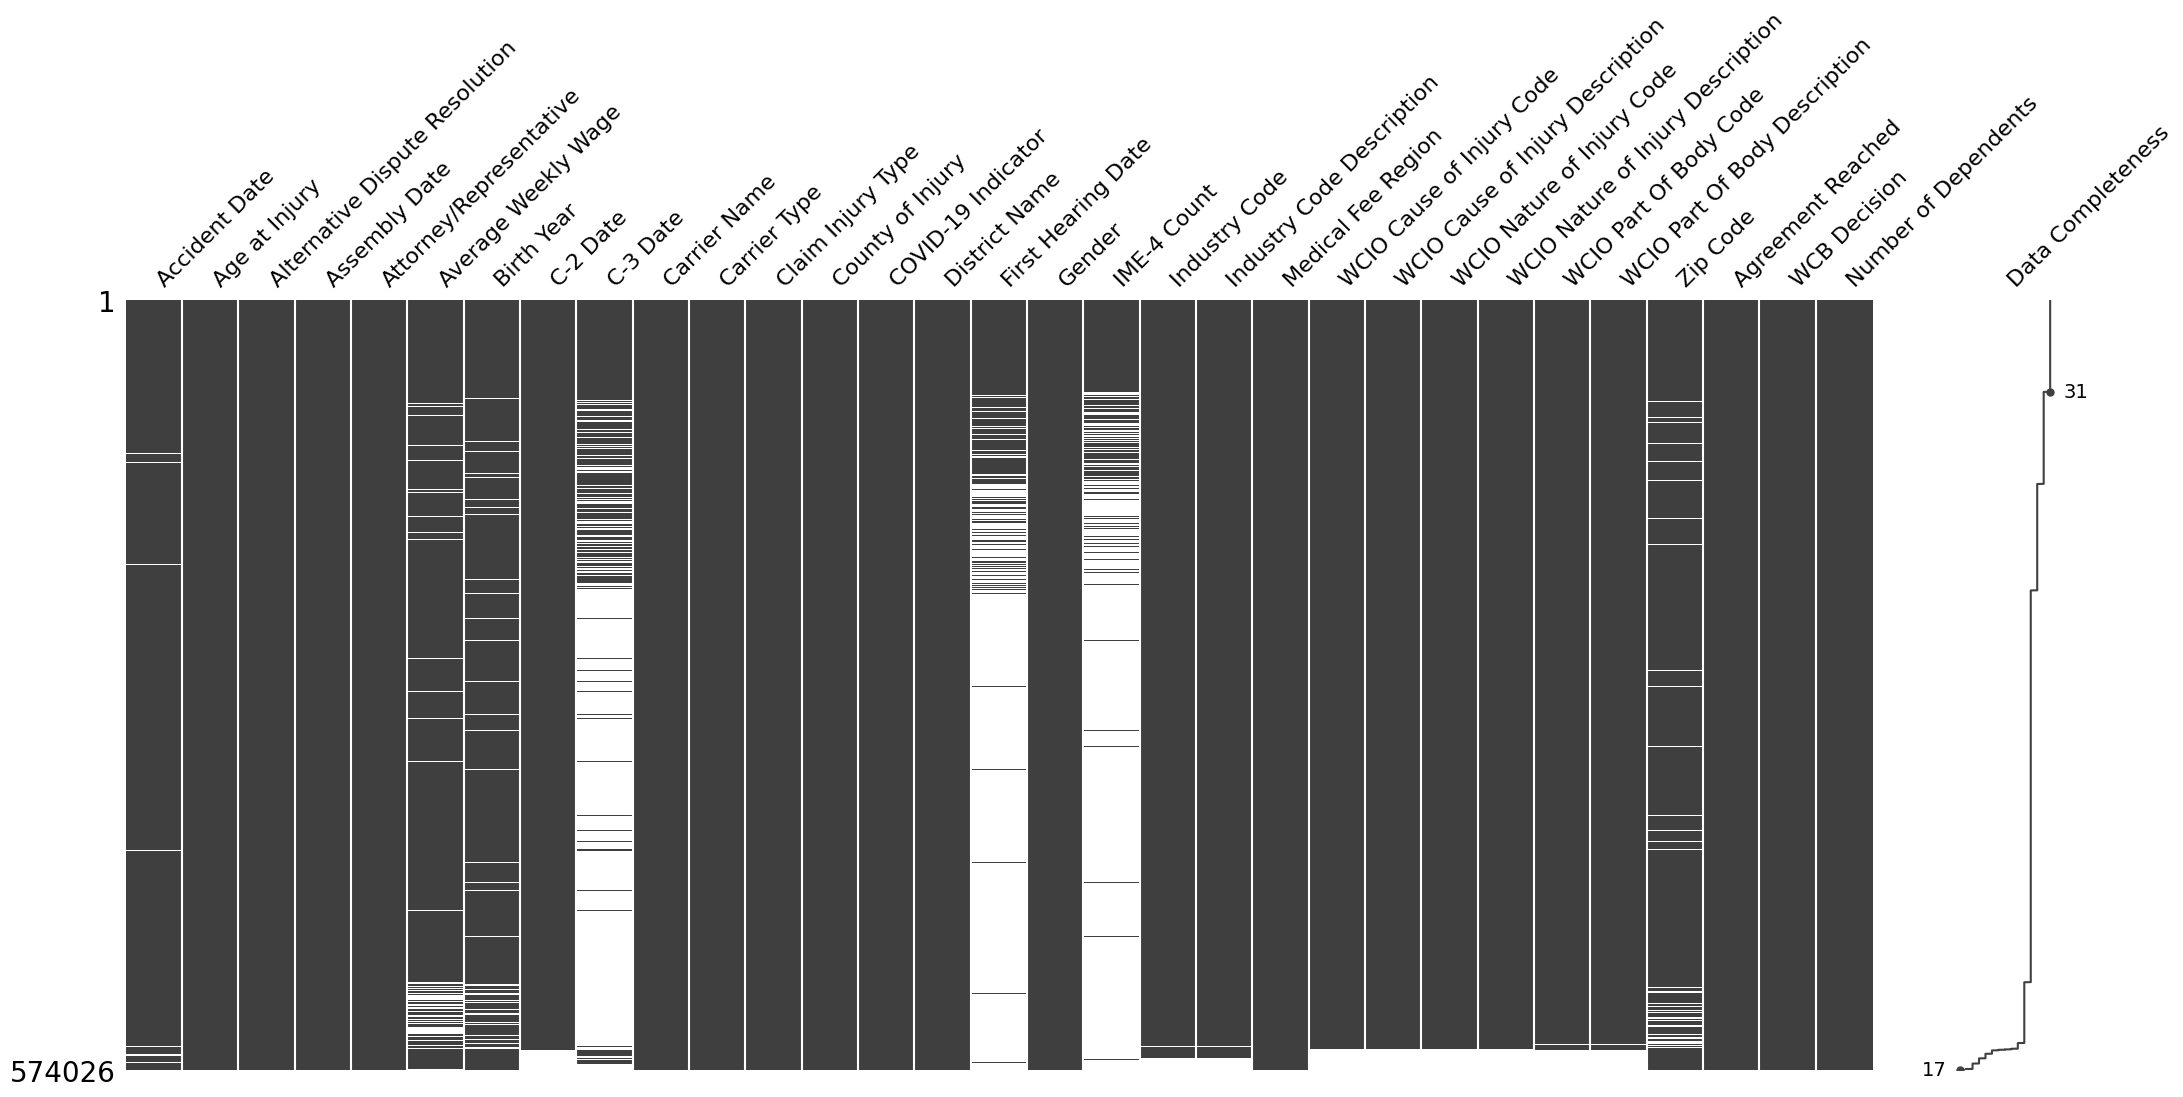

In [12]:
msno.matrix(WCB, labels=True, sort="descending")

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>1. Future: </strong> Should we have drop those columns and rows. Maybe they are the cancelled or something (Check target proportions)
</div>

In [13]:
# Find the duplicated rows excluding the 'Claim Identifier'
duplicated_rows = WCB[WCB.duplicated(subset=WCB.columns.difference(['Claim Identifier']), keep=False)]
duplicated_rows

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5686981,NaT,0.0,N,2021-03-25,Y,0.0,1968.0,NaT,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0
5686771,NaT,0.0,N,2021-03-25,Y,0.0,1968.0,NaT,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0


In [14]:
# It doesn't matter which one we drop
WCB = WCB.drop(index=5686771)

> Here, we noticed that there were rows where all variables were identical except for one. Since we couldn't be certain whether these were duplicates, we decided to leave this issue unresolved until the final project submission.

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>2. Future: </strong> Look for rows with all variables the same except for 1
</div>

In [15]:
# Example of columns to check for duplicates (replace with your relevant columns)
columns_to_check = ['Age at Injury', 'Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'Alternative Dispute Resolution', 'Attorney/Representative',
					'Average Weekly Wage', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date',
					'Birth Year', 'Gender', 'IME-4 Count', 'Industry Code', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Code',
					'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',	'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
                    'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached', 'WCB Decision', 'Claim Injury Type'] 						

#'Number of Dependents'

# Identify duplicate rows based on the specified columns
duplicates = WCB[WCB.duplicated(subset=columns_to_check, keep=False)]

# Print the duplicate rows
duplicates.head(5)

# Remove these duplicates
#WCB = WCB[~WCB.duplicated(subset=columns_to_check, keep='first')]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5531418,2020-07-26,30.0,N,2020-08-05,N,0.0,1990.0,2020-08-05,NaT,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaT,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,52.0,UPPER LEG,98188,0.0,Not Work Related,1.0
5531371,2020-07-26,30.0,N,2020-08-05,N,0.0,1990.0,2020-08-05,NaT,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaT,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,52.0,UPPER LEG,98188,0.0,Not Work Related,3.0
5628923,2020-12-17,18.0,N,2021-01-05,N,0.0,2002.0,2021-01-05,NaT,FIRE DISTRICTS OF NEW YORK,1A. PRIVATE,2. NON-COMP,SUFFOLK,Y,HAUPPAUGE,NaT,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11769,0.0,Not Work Related,5.0
5628934,2020-12-17,18.0,N,2021-01-05,N,0.0,2002.0,2021-01-05,NaT,FIRE DISTRICTS OF NEW YORK,1A. PRIVATE,2. NON-COMP,SUFFOLK,Y,HAUPPAUGE,NaT,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11769,0.0,Not Work Related,6.0
5686981,NaT,0.0,N,2021-03-25,Y,0.0,1968.0,NaT,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0


---

In [16]:
# Get unique counts for each column
unique_counts = WCB.nunique()  

# Filter columns with less than 100 unique values
filtered_col = [col for col in unique_counts.index if unique_counts[col] < 100]

# Display unique values for filtered columns
print("Unique values for each column:\n")
for col in filtered_col:
    print(f"{col} ({unique_counts[col]}): {WCB[col].unique()}\n")

Unique values for each column:

Alternative Dispute Resolution (3): ['N' 'Y' 'U']

Attorney/Representative (2): ['N' 'Y']

Carrier Type (8): ['1A. PRIVATE' '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC' 'UNKNOWN'
 '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']

Claim Injury Type (8): ['2. NON-COMP' '4. TEMPORARY' '3. MED ONLY' '5. PPD SCH LOSS' '6. PPD NSL'
 '1. CANCELLED' '8. DEATH' '7. PTD']

County of Injury (63): ['ST. LAWRENCE' 'WYOMING' 'ORANGE' 'DUTCHESS' 'SUFFOLK' 'ONONDAGA'
 'RICHMOND' 'MONROE' 'KINGS' 'NEW YORK' 'QUEENS' 'WESTCHESTER' 'GREENE'
 'NASSAU' 'ALBANY' 'ERIE' 'BRONX' 'CAYUGA' 'NIAGARA' 'LIVINGSTON'
 'WASHINGTON' 'MADISON' 'WARREN' 'SENECA' 'GENESEE' 'SARATOGA'
 'CHAUTAUQUA' 'COLUMBIA' 'RENSSELAER' 'CATTARAUGUS' 'ROCKLAND' 'SCHUYLER'
 'BROOME' 'ULSTER' 'CLINTON' 'ONEIDA' 'UNKNOWN' 'MONTGOMERY' 'ONTARIO'
 'SCHENECTADY' 'CHEMUNG' 'YATES' 'HERKIMER' 'ALLEGANY' 'TIOGA' 'FULTON'
 'DELAWARE' 'TOMPK

From this output, we can draw some interesting observations:
- The variable "WCB Decision" only takes a single value, "Not work related," which is incorrect. Therefore, we will drop this column.
- In addition to all the variables we had already seen that had missing values, we found even more here:
  - Alternative Dispute Resolution: 'U' (0.00087% of rows)
  - Carrier Type: 'UNKNOWN' (0.31%)
  - County of Injury: 'UNKNOWN' (0.21%)
  - Gender: 'U' (0.82%)
  - Medical Fee Region: 'UK' (5.83%)

In [17]:
WCB = WCB.drop(columns=['WCB Decision'])

In [18]:
#Print the name of variables with Unknown values
WCB.columns[WCB.isin(['U', 'Unknown', 'UNKNOWN']).any()]

Index(['Alternative Dispute Resolution', 'Carrier Type', 'County of Injury',
       'Gender'],
      dtype='object')

In [19]:
# Calculate the percentage of rows where Alternative Dispute Resolution is 'U'
ADR_u = (WCB[WCB['Alternative Dispute Resolution'] == 'U'].shape[0] / WCB.shape[0]) * 100

# Print the result
print(f"Percentage of rows where Alternative Dispute Resolution == 'U': {ADR_u:.5f}%")


Percentage of rows where Alternative Dispute Resolution == 'U': 0.00087%


In [20]:
# Calculate the percentage of rows where Carrier Type is 'UNKNOWN'
CT_u = (WCB[WCB['Carrier Type'] == 'UNKNOWN'].shape[0] / WCB.shape[0]) * 100

# Print the result
print(f"Percentage of rows where Carrier Type == 'UNKNOWN': {CT_u:.2f}%")

Percentage of rows where Carrier Type == 'UNKNOWN': 0.31%


In [21]:
# Calculate the percentage of rows where County of Injury is 'UNKNOWN'
CI_u = (WCB[WCB['County of Injury'] == 'UNKNOWN'].shape[0] / WCB.shape[0]) * 100

# Print the result
print(f"Percentage of rows where County of Injury == 'UNKNOWN': {CI_u:.2f}%")
  
 

Percentage of rows where County of Injury == 'UNKNOWN': 0.21%


In [22]:
# Calculate the percentage of rows where Gender is 'U'
G_u = (WCB[WCB['Gender'] == 'U'].shape[0] / WCB.shape[0]) * 100

# Print the result
print(f"Percentage of rows where Gender == 'U': {G_u:.2f}%")

Percentage of rows where Gender == 'U': 0.82%


In [23]:
# Calculate the percentage of rows where Medical Fee Region is 'UK'
MFR_u = (WCB[WCB['Medical Fee Region'] == 'UK'].shape[0] / WCB.shape[0]) * 100

# Print the result
print(f"Percentage of rows where Medical Fee Region == 'UK': {MFR_u:.2f}%") 

Percentage of rows where Medical Fee Region == 'UK': 5.83%


In [24]:
# Replace these values with NaN
WCB.replace({
    'Alternative Dispute Resolution': 'U',
    'Carrier Type': 'UNKNOWN',
    'County of Injury': 'UNKNOWN',
    'Gender': 'U',
    'Medical Fee Region': 'UK'
}, np.nan, inplace=True)

<a id='descriptive-statistics'></a>
### 3.2 Descriptive Statistics

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>2.1. Future: </strong> 
 All the numerical variables<br>
numerical = [ ""]

 All the categorical variables <br>
categorical = ...
</div>

In [25]:
round(WCB.describe(),2) 

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,First Hearing Date,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,570337,574025.00,574025,545374.00,544947.00,559466,187244,150797,132803.00,564068.00,558386.00,558369.00,556944.00,574025.00,574025.00
mean,2021-04-28 21:00:27.892982784,42.11,2021-07-19 19:01:54.473760256,491.09,1886.77,2021-07-16 20:11:19.865443328,2021-07-26 21:32:29.772489728,2022-03-19 05:05:32.863386368,3.21,58.65,54.38,41.01,39.74,0.05,3.01
min,1961-09-06 00:00:00,0.00,2020-01-01 00:00:00,0.00,0.00,1996-01-12 00:00:00,1992-11-13 00:00:00,2020-01-30 00:00:00,1.00,11.00,1.00,1.00,-9.00,0.00,0.00
25%,2020-09-14 00:00:00,31.00,2020-10-27 00:00:00,0.00,1965.00,2020-11-06 00:00:00,2020-10-27 00:00:00,2021-06-01 00:00:00,1.00,45.00,31.00,16.00,33.00,0.00,1.00
50%,2021-06-27 00:00:00,42.00,2021-07-30 00:00:00,0.00,1977.00,2021-08-09 00:00:00,2021-07-21 00:00:00,2022-03-09 00:00:00,2.00,61.00,56.00,49.00,38.00,0.00,3.00
75%,2022-03-21 00:00:00,54.00,2022-04-19 00:00:00,841.00,1989.00,2022-04-26 00:00:00,2022-04-20 00:00:00,2023-01-11 00:00:00,4.00,71.00,75.00,52.00,53.00,0.00,5.00
max,2023-09-29 00:00:00,117.00,2022-12-31 00:00:00,2828079.00,2018.00,2024-06-01 00:00:00,2024-05-31 00:00:00,2024-06-07 00:00:00,73.00,92.00,99.00,91.00,99.00,1.00,6.00
std,NaN,14.26,NaN,6092.92,414.64,NaN,NaN,NaN,2.83,19.64,25.87,22.21,22.37,0.21,2.00


>• It seems unusual that the minimum age for "Age at Injury" is recorded as 0 and the maximum is 117.      
• We have accidents that occurred many years ago, such as the min 1961-09-06. It may not make sense to include these cases in our analysis, as there have been numerous changes over the years regarding all aspects of the claims process and the operation of the WCB itself.      
• It is concerning that over half of the injured workers have an "Average Weekly Wage" of 0.     
• Having a "Birth Year" of 0 does not make sense.    
• The minimum for WCIO Part Of Body Code is -9, perhaps this is not a code that actually exists.

In [26]:
WCB.describe(include='object').T

,count,unique,top,freq
Alternative Dispute Resolution,574020,2,N,571411
Attorney/Representative,574025,2,N,392291
Carrier Name,574025,2046,STATE INSURANCE FUND,111144
Carrier Type,572251,7,1A. PRIVATE,285367
Claim Injury Type,574025,8,2. NON-COMP,291078
County of Injury,572829,62,SUFFOLK,60430
COVID-19 Indicator,574025,2,N,546504
District Name,574025,8,NYC,270778
Gender,569314,3,M,335217
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


> Among the various insights this provides, we can highlight:         
• More than 99% of the rows that do not have 'Alternative Dispute Resolution' as missing take the value 'N'.       
• All counties in New York are represented here (also looking at the unique values listed before). [Source 3](https://www.ny.gov/counties)     
• About half of the claims fall under category 2: NON-COMP -> No indemnity benefits awarded for the claim. [Source 4](https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data)

<a id='checking-for-incoherencies'></a>
### 3.3 Checking Incoherencies

By examining the unique values of each column and delving deeper into each variable, we have identified several inconsistencies.

In [27]:
# Replace the strange characters by NaN
strange_values = ["!","$","%","?","*","+","_","@","€"," ","{"]
# Count the number of cases where any column contains strange characters
strange_cases = WCB[WCB.isin(strange_values).any(axis=1)]
strange_cases.shape[0]

0

We had already seen with the unique values that there were no strange characters, but this way we confirm it better. If there were any, we would change the values to NaN

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>3. Future: </strong> Consistency across regions, medical fee...
</div>

<div style="padding: 10px; border: 1px solid #e0e0e0; background-color: #f0f0f0; color: #333;">
    <strong>I. Test:</strong> Check strange characters;<br>
     WCB.loc[WCB['Carrier Name'] == 'SPECIAL FUNDS SEC 25-A', 'Carrier Type'] = '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'; <br>
    WCB.loc[WCB['WCIO Part Of Body Code'] == -9, 'WCIO Part Of Body Code'] = 90
    WCB.loc[WCB['WCIO Part Of Body Code'] == 90, 'WCIO Part Of Body Description'] = 'MULTIPLE BODY PARTS'<br>
    WCB['Average Weekly Wage'] == 0]<br>
    Birth Year'] == 0<br>
    'Age at Injury'] == 0)<br>
    ['Age at Injury'] + WCB['Birth Year'] == WCB['Accident Date'].dt.year) |
    (WCB['Age at Injury'] + WCB['Birth Year'] == WCB['Accident Date'].dt.year - 1) |
    (WCB['Age at Injury'] + WCB['Birth Year'] == WCB['Accident Date'].dt.year + 1) <br><br>
    (WCB['Accident Date'] <= WCB['Assembly Date']) <br>
    X_test['IME-4 Count'] = X_test['IME-4 Count'].fillna(0)

</div>

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 35%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Carrier Name & Carrier Type
</div>

Let's verify if each 'Carrier Name' is associated with only a single 'Carrier Type'.

In [28]:
# Group by 'Carrier Name' and get the unique 'Carrier Type' values
carrier_types = WCB.groupby('Carrier Name')['Carrier Type'].unique()

# Count the number of unique 'Carrier Type' for each 'Carrier Name'
carrier_check = WCB.groupby('Carrier Name')['Carrier Type'].nunique()

# Filter for carriers that have more than one unique type
multiple_types = carrier_types[carrier_check > 1]

# Print the carriers with more than one type and their corresponding types
print("Carriers with more than one type and their types:")
for carrier, types in multiple_types.items():
    print(f"{carrier}: {types}")

Carriers with more than one type and their types:
SPECIAL FUNDS SEC 25-A: ['5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5D. SPECIAL FUND - UNKNOWN']


This carrier name doesn't make sense. It actually corresponds to the carrier type.

In [29]:
# Most common Carrier Name for the specified Carrier Type
#most_common_name = WCB[WCB['Carrier Type'] == '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)']['Carrier Name'].mode()[0]

# Update the Carrier Type for rows where Carrier Name is 'SPECIAL FUNDS SEC 25-A'
WCB.loc[WCB['Carrier Name'] == 'SPECIAL FUNDS SEC 25-A', 'Carrier Type'] = '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'

In [30]:
special_funds_rows = WCB[WCB['Carrier Type'] == '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)']
special_funds_rows

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5417610,2014-09-24,58.0,N,2020-01-31,Y,0.0,1956.0,2021-05-03,NaT,SPECIAL FUNDS SEC 25-A,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),3. MED ONLY,NEW YORK,N,STATEWIDE,2021-01-14,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",48.0,INTERNAL ORGANS,11561,0.0,3.0
5439830,1969-04-01,28.0,N,2020-02-28,N,0.0,1941.0,NaT,2020-01-30,SPECIAL FUNDS SEC 25-A,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),2. NON-COMP,SCHENECTADY,N,ALBANY,NaT,M,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,12304,0.0,2.0
5574057,1989-03-09,19.0,N,2020-10-08,N,0.0,0.0,NaT,NaT,SPECIAL FUNDS SEC 25-A,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),1. CANCELLED,ALBANY,N,ALBANY,NaT,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77380,0.0,1.0
5675798,1980-10-06,0.0,N,2021-03-10,N,0.0,0.0,NaT,NaT,SPECIAL FUNDS SEC 25-A,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),1. CANCELLED,ESSEX,N,ALBANY,NaT,F,NaN,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,12956,0.0,6.0
5694541,2000-10-03,36.0,N,2021-04-07,N,0.0,1964.0,NaT,NaT,SPECIAL FUNDS SEC 25-A,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),1. CANCELLED,MONROE,N,ROCHESTER,NaT,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,14609,0.0,4.0
5978298,1999-01-28,36.0,N,2022-04-29,N,0.0,1963.0,NaT,NaT,SPECIAL FUNDS SEC 25-A,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),1. CANCELLED,SUFFOLK,N,HAUPPAUGE,NaT,M,NaN,NaN,NaN,III,NaN,NaN,NaN,NaN,NaN,NaN,11953,0.0,6.0


Theoretically, we should also change the Carrier Name, as it is technically incorrect. However, since there are no other Carrier Names associated with this Carrier Type ('5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)') and we are unlikely to use the Carrier Name variable in our models, we will leave Carrier Name as is.

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 35%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Industry Code & Description
</div>

In [31]:
# Group by 'Industry Code' and count the unique values in 'Industry Code Description'
industry_check = WCB.groupby('Industry Code')['Industry Code Description'].nunique()

# Filter for cases where there is more than one unique 'Industry Code Description'
multiple_types = industry_check[industry_check > 1]

print("Industry Codes with more than one description:")
for code in multiple_types.index:
    descriptions = WCB[WCB['Industry Code'] == code]['Industry Code Description'].unique()
    print(f"{code}: {descriptions}")

Industry Codes with more than one description:


In [32]:
# create a dictionary with WCIO Cause of Injury Code and Description. WCIO Nature of Injury Code and Description, WCIO Part of Body Code and Description, Industry Code and Description
C_o_In_indicators = WCB[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',]].drop_duplicates().set_index('WCIO Cause of Injury Code').sort_index()
N_o_In_indicators = WCB[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',]].drop_duplicates().set_index('WCIO Nature of Injury Code').sort_index()
P_o_B_indicators = WCB[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates().set_index('WCIO Part Of Body Code').sort_index()
Ind_indicators = WCB[['Industry Code', 'Industry Code Description',]].drop_duplicates().set_index('Industry Code').sort_index()

# print each dictionary
C_o_In_indicators
N_o_In_indicators
P_o_B_indicators
Ind_indicators

# check whether there are codes two times and print it with the len of the WCB
print(len(C_o_In_indicators[C_o_In_indicators.index.duplicated()]))
print(len(N_o_In_indicators[N_o_In_indicators.index.duplicated()]))
print(len(P_o_B_indicators[P_o_B_indicators.index.duplicated()]))
print(len(Ind_indicators[Ind_indicators.index.duplicated()]))

0
0
0
0


In [33]:
# Group by 'Industry Code Description' and count the unique values in 'Industry Code'
code_check = WCB.groupby('Industry Code Description')['Industry Code'].nunique()

# Filter for cases where there is more than one unique 'Industry Code'
multiple_types = code_check[code_check > 1]

# Print the Industry Code Descriptions with their corresponding codes
print("\nIndustry Code Descriptions with more than one code:")
for description in multiple_types.index:
    codes = WCB[WCB['Industry Code Description'] == description]['Industry Code'].unique()
    print(f"{description}: {codes}")


Industry Code Descriptions with more than one code:
MANUFACTURING: [31. 33. 32.]
RETAIL TRADE: [44. 45.]
TRANSPORTATION AND WAREHOUSING: [48. 49.]


> Each code has only one description. But each description doesn’t always have the same code. Given our source, we assume that these are not errors:      
31-33 Manufacturing    
44-45 Retail Trade    
48-49 Transportation and Warehousing   
[Source 5](https://www.naics.com/search/)


<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 50%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    WCIO Cause of Injury Code & Description
</div>

In [34]:
# Group by 'WCIO Cause of Injury Code' and count the unique values in 'WCIO Cause of Injury Description'
cause_check = WCB.groupby('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].nunique()

# Filter for cases where there is more than one unique 'WCIO Cause of Injury Description'
multiple_types = cause_check[cause_check > 1]

print("Industry Codes with more than one description:")
for code in multiple_types.index:
    descriptions = WCB[WCB['WCIO Cause of Injury Code'] == code]['WCIO Cause of Injury Description'].unique()
    print(f"{code}: {descriptions}")

Industry Codes with more than one description:


In [35]:
# Group by 'WCIO Cause of Injury Code Description' and count the unique values in 'WCIO Cause of Injury Code'
code_check = WCB.groupby('WCIO Cause of Injury Description')['WCIO Cause of Injury Code'].nunique()

# Filter for cases where there is more than one unique 'WCIO Cause of Injury Code'
multiple_types = code_check[code_check > 1]

print("WCIO Cause of Injury Code Descriptions with more than one code:")
for description in multiple_types.index:
    codes = WCB[WCB['WCIO Cause of Injury Description'] == description]['WCIO Cause of Injury Code'].unique()
    print(f"{description}: {codes}")

WCIO Cause of Injury Code Descriptions with more than one code:
OBJECT BEING LIFTED OR HANDLED: [79. 17. 66.]
REPETITIVE MOTION: [97. 94.]


> Each code has only one description. But each description doesn’t always have the same code. Given our source, we assume that these are not errors and indeed represent different types of injury:    
17- Object Being Lifted or Handled; Includes being cut, punctured or scraped by a person or object being lifted or handled;      
66- Object Being Lifted or Handled;    
79- Object Being Lifted or Handled; Includes dropping object on body part;    
94- Repetitive Motion; Caused by repeated rubbing or abrading; applies to non-impact cases in which the injury was produced by pressure, vibration or friction between the person and the source of injury. Includes callous, blister;    
97- Repetitive Motion; Cumulative injury or condition caused by continual, repeated motions; strain by excessive use. Includes Carpal Tunnel Syndrome.   
[Source 6](https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)

<span style="color:red"><b>...COVID-19 doesn't exist in the link put it in a bin</b></span>  

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 50%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    WCIO Nature of Injury Code & Description
</div>

In [36]:
# Group by 'WCIO Nature of Injury Code' and count the unique values in 'WCIO Nature of Injury Description'
cause_check = WCB.groupby('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].nunique()

# Filter for cases where there is more than one unique 'WCIO Nature of Injury Description'
multiple_types = cause_check[cause_check > 1]

print("WCIO Nature of Injury Codes with more than one description:")
for code in multiple_types.index:
    descriptions = WCB[WCB['WCIO Nature of Injury Code'] == code]['WCIO Nature of Injury Description'].unique()
    print(f"{code}: {descriptions}")

WCIO Nature of Injury Codes with more than one description:


In [37]:
# Group by 'WCIO Nature of Injury Description' and count the unique values in 'WCIO Nature of Injury Code'
code_check = WCB.groupby('WCIO Nature of Injury Description')['WCIO Nature of Injury Code'].nunique()

# Filter for cases where there is more than one unique 'WCIO Nature of Injury Code'
multiple_types = code_check[code_check > 1]

print("WCIO Nature of Injury Descriptions with more than one code:")
for description in multiple_types.index:
    codes = WCB[WCB['WCIO Nature of Injury Description'] == description]['WCIO Nature of Injury Code'].unique()
    print(f"{description}: {codes}")

WCIO Nature of Injury Descriptions with more than one code:


For this variable, each code has one and only one description

<span style="color:red"><b>38.0 ADVERSE REACTION TO A VACCINATION OR INOCULATION & 83.0 COVID-19 don't exist in the link PUT THEM IN A BIN</b></span>  

 <div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 50%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    WCIO Part Of Body Code & Description
</div>

In [38]:
# Group by 'WCIO Part Of Body Code' and count the unique values in 'WCIO Part Of Body Description'
cause_check = WCB.groupby('WCIO Part Of Body Code')['WCIO Part Of Body Description'].nunique()

# Filter for cases where there is more than one unique 'WCIO Part Of Body Description'
multiple_types = cause_check[cause_check > 1]

print("WCIO Part Of Body Codes with more than one description:")
for code in multiple_types.index:
    descriptions = WCB[WCB['WCIO Part Of Body Code'] == code]['WCIO Part Of Body Description'].unique()
    print(f"{code}: {descriptions}")

WCIO Part Of Body Codes with more than one description:


In [39]:
# Group by 'WCIO Part Of Body Description' and count the unique values in 'WCIO Part Of Body Code'
code_check = WCB.groupby('WCIO Part Of Body Description')['WCIO Part Of Body Code'].nunique()

# Filter for cases where there is more than one unique 'WCIO Part Of Body Code'
multiple_types = code_check[code_check > 1]

print("WCIO Part Of Body Descriptions with more than one code:")
for description in multiple_types.index:
    codes = WCB[WCB['WCIO Part Of Body Description'] == description]['WCIO Part Of Body Code'].unique()
    print(f"{description}: {codes}")

WCIO Part Of Body Descriptions with more than one code:
DISC: [43. 22.]
SOFT TISSUE: [18. 25.]
SPINAL CORD: [23. 47.]


> Each code has only one description. But each description doesn’t always have the same code. Given our source, we assume that these are not errors and indeed represent different parts of the body injured:  
22- Disc; Includes: spinal column cartilage, "cervical segment";  
43- Disc; Spinal column cartilage other than cervical segment;   
18- Soft Tissue;    
25- Soft Tissue; Other than larynx or trachea;   
23- Spinal Cord; Includes: nerve tissue, "cervical segment";    
47- Spinal Cord; Nerve tissue other than cervical segment.     
[Source 6](https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)

In [40]:
# Update the rows where 'WCIO Part Of Body Code' is -9
WCB.loc[WCB['WCIO Part Of Body Code'] == -9, 'WCIO Part Of Body Code'] = 90
WCB.loc[WCB['WCIO Part Of Body Code'] == 90, 'WCIO Part Of Body Description'] = 'MULTIPLE BODY PARTS'

We identified that there was a code -9 with a description similar to that of code 90, so we combined the two.

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 30%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Average Weekly Wage
</div>

In [41]:
# 10 lowest 'Average Weekly Wage'
bottom_10_AWW = WCB['Average Weekly Wage'].drop_duplicates().sort_values(ascending=True).head(10)
print(bottom_10_AWW)

Claim Identifier
5393875     0.00
6134140    13.94
5407195    17.41
5465152    23.27
5834045    27.49
5808244    30.88
5567213    31.54
5543718    32.00
5940611    34.23
5616419    35.00
Name: Average Weekly Wage, dtype: float64


In [42]:
WCB[WCB['Average Weekly Wage'] == 0].shape[0]

335449

In [43]:
WCB.shape[0]

574025

In [44]:
# Replace all instances of Average Weekly Wage == 0 with NaN
WCB.loc[WCB['Average Weekly Wage'] == 0, 'Average Weekly Wage'] = np.nan

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>3. Future: </strong> without the first 25% (until 2020) we could take the min hour wage*part-time and that would be our min<br>
https://www.wcb.ny.gov/content/main/Workers/CalcAverageWeeklyWage.jsp how to calculate AWW
</div>

In [45]:
AWW_mean = WCB['Average Weekly Wage'].mean()
print(f'The mean AWW (excluding AWW = 0) is: {AWW_mean}')

The mean AWW (excluding AWW = 0) is: 1275.8237127069194


> More than half (335449/574025=58%) of our observations have AWW=0, which makes no sense.  

> We know that the New York State Average Weekly Wage (NYSAWW) for the calendar year 2023 was $1,757.19, and for 2019 it was $1,450.17. [Source 7](https://dol.ny.gov/new-york-state-average-weekly-wage-nysaww-0) [& Source 8](https://dol.ny.gov/new-york-state-average-weekly-wage-nysaww)    
Given that we have cases with accidents occurring long before 2019, when minimum wages were significantly lower, and considering that the average AWW  (excluding values of 0) is close to these reference amounts, we will assume all non-zero AWW values are correct.

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Birth Year
</div>

In [46]:
# Top 10 oldest 'Birth Year'
top_10_oldest = WCB['Birth Year'].drop_duplicates().sort_values(ascending=True).head(10)
print(top_10_oldest)

Claim Identifier
5394187       0.0
5494968    1900.0
5399016    1901.0
5702777    1902.0
5928018    1903.0
5432944    1907.0
6163465    1909.0
5559268    1910.0
5706270    1911.0
5453673    1916.0
Name: Birth Year, dtype: float64


In [47]:
# Replace all instances of Birth Year == 0 with NaN
WCB.loc[WCB['Birth Year'] == 0, 'Birth Year'] = np.nan

In [48]:
filtered_rows = WCB[(WCB['Accident Date'] > '2020-01-01') & (WCB['Birth Year'] < 1940)] #at least 80
filtered_rows

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5397417,2020-01-06,80.0,N,2020-01-07,N,NaN,1939.0,2020-01-07,NaT,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,ERIE,N,BUFFALO,2020-02-21,F,NaN,45.0,RETAIL TRADE,I,60.0,"STRAIN OR INJURY BY, NOC",53.0,SYNCOPE,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,14043,0.0,0.0
5398294,2020-01-03,80.0,N,2020-01-08,N,NaN,1939.0,2020-01-07,NaT,NEW JERSEY MANUFACTURERS,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,18.0,SOFT TISSUE,11768,0.0,2.0
5398474,2020-01-06,89.0,N,2020-01-08,Y,201.73,1930.0,2020-01-08,NaT,UTICA NATIONAL ASSURANCE CO,1A. PRIVATE,5. PPD SCH LOSS,WARREN,N,ALBANY,2021-06-02,F,5.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",I,33.0,ON STAIRS,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,12804,0.0,3.0
5401227,2020-01-07,81.0,N,2020-01-10,Y,911.45,1938.0,2020-01-10,2020-06-26,HARTFORD INS CO OF THE MIDWEST,1A. PRIVATE,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,2022-03-30,F,2.0,81.0,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),III,29.0,ON SAME LEVEL,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,11961,0.0,6.0
5399624,2020-01-04,80.0,N,2020-01-10,N,650.00,1939.0,2020-01-10,NaT,AMTRUST INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,RICHMOND,N,NYC,2021-02-17,F,3.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,27.0,FROM LIQUID OR GREASE SPILLS,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",53.0,KNEE,10302,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160703,2022-12-20,98.0,N,2022-12-22,N,NaN,1925.0,2022-12-22,NaT,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,MONROE,N,ROCHESTER,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,75.0,FALLING OR FLYING OBJECT,40.0,LACERATION,18.0,SOFT TISSUE,14611,0.0,3.0
6163465,2022-12-23,114.0,N,2022-12-28,N,NaN,1909.0,2022-12-28,NaT,EVEREST PREMIER INSURANCE,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaT,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,IV,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,10001,0.0,3.0
6164182,2022-12-21,101.0,N,2022-12-29,N,NaN,1922.0,2022-12-29,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,BROOME,N,BINGHAMTON,NaT,M,NaN,51.0,INFORMATION,I,1.0,CHEMICALS,37.0,INFLAMMATION,44.0,CHEST,13760,0.0,2.0


In [49]:
filtered_rows.shape[0]/WCB.shape[0]*100


0.11515177910369759

In [50]:
WCB[(WCB['Birth Year'] < 1940)].shape[0]/WCB.shape[0]*100

0.1405862114019424

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>4. Future: </strong> Should We delete some of these older people?

We decided to drop injured workers born before ..., as we believe they are unlikely to help in predicting cases.
filtered_rows_1 = WCB[ WCB['Birth Year'] < 1920]
filtered_rows_2 = WCB[WCB['Birth Year'] > 2023]
print(filtered_rows_2.shape)
filtered_rows_1

WCB = WCB.drop(filtered_rows_1.index)
</div>

> The current retirement age in New York is around 60 years, however, in cities like New York, many older individuals are compelled to continue working because their pensions are insufficient to cover their living expenses. Given this context and the low percentage of cases where "Birth Year" is less than 1940, we will not consider these instances as errors for now. [Source 9](https://www.osc.ny.gov/retirement/members/about-benefit-reductions)

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 30%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Number of Dependents
</div>

This variable is not listed in the variable description provided to us, which raises the question of whether it was a mistake or if it might not be very important for prediction. We will investigate this further during the feature selection process.

In [51]:
WCB[(WCB['Number of Dependents'] > 0) & (WCB['Age at Injury'].between(1,15))]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5399005,2019-12-29,11.0,N,2020-01-08,N,NaN,NaN,2020-01-08,NaT,EVEREST NATIONAL INS COMPANY,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaT,F,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,50.0,MULTIPLE LOWER EXTREMITIES,75232,0.0,1.0
5399088,2020-01-05,15.0,N,2020-01-08,N,NaN,2004.0,2020-01-08,NaT,PUBLIC EMPLOYERS RISK MGMT.,3A. SELF PUBLIC,2. NON-COMP,NEW YORK,N,NYC,NaT,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),10001,0.0,5.0
5412625,2020-01-09,1.0,N,2020-01-25,N,NaN,2018.0,2020-01-24,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,11.0,SKULL,11720,0.0,6.0
5412736,2020-01-09,1.0,N,2020-01-25,N,NaN,2018.0,2020-01-24,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,11.0,SKULL,11720,0.0,4.0
5412861,2020-01-17,10.0,N,2020-01-27,N,NaN,2009.0,2020-01-27,NaT,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,2. NON-COMP,ROCKLAND,N,NYC,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,70.0,"STRIKING AGAINST OR STEPPING ON, NOC",10.0,CONTUSION,15.0,NOSE,10954,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147228,2022-11-01,15.0,N,2022-12-05,N,NaN,2007.0,2022-12-05,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,RENSSELAER,N,ALBANY,NaT,F,NaN,81.0,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),II,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,33.0,LOWER ARM,12180,0.0,4.0
6149285,2022-12-03,15.0,N,2022-12-07,N,132.75,2007.0,2022-12-07,NaT,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,NaT,M,NaN,61.0,EDUCATIONAL SERVICES,IV,54.0,JUMPING OR LEAPING,28.0,FRACTURE,34.0,WRIST,11040,0.0,1.0
6150337,2022-11-19,8.0,N,2022-12-08,N,NaN,2014.0,2022-12-08,NaT,GUIDEONE MUTUAL INS CO,1A. PRIVATE,2. NON-COMP,WESTCHESTER,N,NYC,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,III,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,90.0,MULTIPLE BODY PARTS,10701,0.0,4.0


In [52]:
WCB[(WCB['Number of Dependents'] > 0) & (WCB['Age at Injury'].between(1,15))& (WCB['Accident Date']<'2015-01-01')].shape[0]

7

<span style="color:red"><b>This variable did not exist in the handout description, probably it is not relevant, and it is not in the metadata</b></span>

As we can see, there are 179 cases where a person under the age of 16 (excluding zero years) has dependents. We will assume that the error lies in the number of dependents.

In [53]:
WCB.loc[(WCB['Number of Dependents'] > 0) & (WCB['Age at Injury'].between(1, 15)),'Number of Dependents']= 0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 20%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Age at Injury
</div>

In [54]:
# Top 10 youngest 'Age at Injury'
top_10_youngest = WCB['Age at Injury'].drop_duplicates().sort_values(ascending=True).head(10)
print(top_10_youngest)

Claim Identifier
5393971     0.0
5412625     1.0
5453057     5.0
5821685     7.0
5471435     8.0
5864902     9.0
5412861    10.0
5399005    11.0
5664841    12.0
5747487    13.0
Name: Age at Injury, dtype: float64


In [55]:
WCB[(WCB['Age at Injury'] == 0)].shape[0]/WCB.shape[0]*100

0.9517007098993946

In [56]:
WCB.loc[WCB['Age at Injury'] == 0,'Age at Injury']= np.nan

> It is not reasonable for there to be injured workers who are 0 years old, therefore we decided to set those values to NaN.

In [57]:
under_14 = WCB[WCB['Age at Injury'] < 14]

percentage_under_14 = (under_14.shape[0] / WCB.shape[0]) * 100

print(f"Number of rows with age under 14: {under_14.shape[0]} ({percentage_under_14:.2f}%)")

Number of rows with age under 14: 47 (0.01%)


> In New York, the minimum employment age is generally 14, but children can work at 11 for newspaper delivery and 12 on farm. 
[Source 10](https://www.job-applications.com/how-old-to-work/new-york/)     
For this reason, we will not consider these values as errors.

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>5. Future: </strong> Maybe we can correct some of these depending on their Industry Description

</div>

<span style="color:red">
I believe we should retain these rows, as they may hold significant predictive power. These instances could represent situations where children were injured and sought compensation from "their employer". Therefore, whenever we encounter low ages in the test dataset, they will consistently be classified as 2: NON-COMP.

"Yes, there are claims where “Age at Injury” is “0”. This is the case when the necessary information needed for 
this calculation is missing from the case. There are instances where the “Age at Injury” maybe less than “10.” 
These cases could involve, for example, child actors or newspaper carriers. "
    </b></span>

In [58]:
#!!!!!!!!!!!!!!DELETE!!!!!!!!!!!!!!!
# Calculate the relative count (percentage) of each claim injury type for individuals under 14
injury_type_percentage_under_14 = (under_14['Claim Injury Type'].value_counts(normalize=True) * 100)

# Display the results
print(f"Number of rows with age under 14: {under_14.shape[0]} ({percentage_under_14:.2f}%)")
print("Claim Injury Type distribution for individuals under 14 years:")
print(injury_type_percentage_under_14)

Number of rows with age under 14: 47 (0.01%)
Claim Injury Type distribution for individuals under 14 years:
Claim Injury Type
2. NON-COMP     89.361702
1. CANCELLED     6.382979
8. DEATH         2.127660
3. MED ONLY      2.127660
Name: proportion, dtype: float64


---
Before checking for inconsistencies in each date variable, it's important to note that we have already verified that all dates are valid. This means that, for example, there are no cases like "2020-02-31". We confirmed this when converting these variables to datetime format.

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 20%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Accident Date
</div>

Let's check whether the "Accident Date," "Age at Injury," and "Birth Year" variables are consistent with each other.

In [59]:
# Create a new column to check the conditions
WCB['Age_BirthYear_Check'] = (
    (WCB['Age at Injury'] + WCB['Birth Year'] == WCB['Accident Date'].dt.year) |
    (WCB['Age at Injury'] + WCB['Birth Year'] == WCB['Accident Date'].dt.year - 1) |
    (WCB['Age at Injury'] + WCB['Birth Year'] == WCB['Accident Date'].dt.year + 1)  #Even though it doesn't make sense, it is also not that relevant and doing this we catch all the cases
)

# Filter to get rows where the conditions are not met
rows_not_matching = WCB[~WCB['Age_BirthYear_Check']]
WCB = WCB.drop(columns=['Age_BirthYear_Check'])

# Drop rows where 'Accident Date', 'Age at Injury', or 'Birth Year' are missing
rows_not_matching = rows_not_matching.dropna(subset=['Accident Date', 'Age at Injury', 'Birth Year'])

rows_not_matching

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Age_BirthYear_Check
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


There are no inconsistencies here

In [60]:
WCB[WCB['Accident Date']<'1980-01-01'].shape[0]

59

> We identified that some Accident Dates could be excluded as they occurred a long time ago, during a period when different processes were in place that are no longer applicable today. These cases may not be helpful in predicting the outcome of new cases. However, we have left this decision open to be made at the final submission of the project.

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>6. Future: </strong> Maybe we can drop the cases that happend a long time ago.<br>
Maybe we could start looking where accident dates are wrong and go from there

</div>

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 20%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Assembly Date
</div>

In [61]:
valid_dates = (
    (WCB['Accident Date'] <= WCB['Assembly Date'])
)

invalid_entries = WCB[~valid_dates & WCB['Accident Date'].notna() & WCB['Accident Date'].notna()]
invalid_entries

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393953,2020-02-26,57.0,N,2020-01-01,Y,1997.87,1962.0,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5. PPD SCH LOSS,KINGS,N,NYC,2020-05-04,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,0.0
5394099,2020-01-23,62.0,N,2020-01-02,Y,1775.89,1957.0,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,6. PPD NSL,QUEENS,N,NYC,2020-06-05,M,2.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS,11001,0.0,3.0
5393830,2020-03-01,62.0,N,2020-01-02,Y,1467.47,1957.0,2020-01-17,2019-12-27,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,ERIE,N,BUFFALO,2020-08-28,M,NaN,61.0,EDUCATIONAL SERVICES,I,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,1.0
5394613,2020-01-27,57.0,N,2020-01-03,Y,1450.00,NaN,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3A. SELF PUBLIC,5. PPD SCH LOSS,NASSAU,N,NYC,2021-09-01,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,5.0
5394770,2020-01-23,56.0,N,2020-01-03,Y,1334.92,NaN,2020-01-06,2019-12-26,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,NaN,N,NYC,2020-05-29,M,3.0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08736,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162010,2023-02-02,52.0,N,2022-12-26,Y,992.39,1970.0,2022-12-26,NaT,MASSACHUSETTS BAY INS.CO.C/O,1A. PRIVATE,3. MED ONLY,ONEIDA,N,SYRACUSE,2023-11-16,M,3.0,53.0,REAL ESTATE AND RENTAL AND LEASING,II,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),13501,0.0,6.0
6162263,2022-12-28,55.0,N,2022-12-26,N,NaN,1967.0,2022-12-26,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,BRONX,N,NYC,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,07407,0.0,3.0
6161996,2022-12-30,33.0,N,2022-12-27,Y,2884.62,1989.0,2023-02-14,2022-12-20,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,2023-03-17,M,1.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,NaN,0.0,1.0


> It only makes sense for the Assembly Date to occur after the Accident Date. Therefore, in cases where this is not true, we will swap the two dates, making the previous Assembly Date the new Accident Date, and vice versa.

In [62]:
# Swap Accident Date and Assembly Date for invalid entries
WCB.loc[~valid_dates & WCB['Accident Date'].notna(), ['Accident Date', 'Assembly Date']] = WCB.loc[~valid_dates & WCB['Accident Date'].notna(), ['Assembly Date', 'Accident Date']].values

display(WCB[~valid_dates & WCB['Accident Date'].notna()])

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393953,2020-01-01,57.0,N,2020-02-26,Y,1997.87,1962.0,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5. PPD SCH LOSS,KINGS,N,NYC,2020-05-04,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,0.0
5394099,2020-01-02,62.0,N,2020-01-23,Y,1775.89,1957.0,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,6. PPD NSL,QUEENS,N,NYC,2020-06-05,M,2.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS,11001,0.0,3.0
5393830,2020-01-02,62.0,N,2020-03-01,Y,1467.47,1957.0,2020-01-17,2019-12-27,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,ERIE,N,BUFFALO,2020-08-28,M,NaN,61.0,EDUCATIONAL SERVICES,I,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,1.0
5394613,2020-01-03,57.0,N,2020-01-27,Y,1450.00,NaN,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3A. SELF PUBLIC,5. PPD SCH LOSS,NASSAU,N,NYC,2021-09-01,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,5.0
5394770,2020-01-03,56.0,N,2020-01-23,Y,1334.92,NaN,2020-01-06,2019-12-26,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,NaN,N,NYC,2020-05-29,M,3.0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08736,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162010,2022-12-26,52.0,N,2023-02-02,Y,992.39,1970.0,2022-12-26,NaT,MASSACHUSETTS BAY INS.CO.C/O,1A. PRIVATE,3. MED ONLY,ONEIDA,N,SYRACUSE,2023-11-16,M,3.0,53.0,REAL ESTATE AND RENTAL AND LEASING,II,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),13501,0.0,6.0
6162263,2022-12-26,55.0,N,2022-12-28,N,NaN,1967.0,2022-12-26,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,BRONX,N,NYC,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,07407,0.0,3.0
6161996,2022-12-27,33.0,N,2022-12-30,Y,2884.62,1989.0,2023-02-14,2022-12-20,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,2023-03-17,M,1.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,NaN,0.0,1.0


In [63]:
valid_dates = (
    (WCB['Accident Date'] <= WCB['Assembly Date'])
)

invalid_entries = WCB[~valid_dates & WCB['Accident Date'].notna() & WCB['Accident Date'].notna()]

print(f"Number of lines: {invalid_entries.shape[0]}")

Number of lines: 0


<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    C-2 Date
</div>

> It only makes sense for the C-2 Date to follow the Accident Date.

In [64]:
valid_dates = (
    (WCB['Accident Date'] <= WCB['C-2 Date'])
)

invalid_entries = WCB[~valid_dates & WCB['C-2 Date'].notna() & WCB['Accident Date'].notna()]
invalid_entries

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394177,2019-12-24,72.0,N,2020-01-01,Y,273.27,NaN,2019-07-31,2020-01-30,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,4. TEMPORARY,RENSSELAER,N,ALBANY,2020-05-22,M,1.0,44.0,RETAIL TRADE,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),20770,1.0,4.0
5393953,2020-01-01,57.0,N,2020-02-26,Y,1997.87,1962.0,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5. PPD SCH LOSS,KINGS,N,NYC,2020-05-04,M,NaN,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,0.0
5395863,2020-01-06,53.0,N,2020-04-04,Y,1405.00,1967.0,2010-02-19,2011-01-11,OLD REPUBLIC INSURANCE CO.,1A. PRIVATE,5. PPD SCH LOSS,ALBANY,N,ALBANY,2020-10-08,M,NaN,33.0,MANUFACTURING,II,52.0,CONTINUAL NOISE,72.0,LOSS OF HEARING,13.0,EAR(S),12211,0.0,6.0
5396317,2019-12-18,31.0,N,2020-01-06,Y,626.33,1988.0,2019-10-25,NaT,UTICA MUTUAL INS CO,1A. PRIVATE,4. TEMPORARY,NIAGARA,N,BUFFALO,2020-03-26,F,12.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,14094,0.0,6.0
5398162,2020-01-09,34.0,N,2020-03-19,Y,1587.06,1985.0,2020-01-08,2020-02-28,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,ONEIDA,N,SYRACUSE,2024-01-25,M,NaN,92.0,PUBLIC ADMINISTRATION,I,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,30.0,MULTIPLE UPPER EXTREMITIES,NaN,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125297,2022-10-25,57.0,N,2022-11-04,Y,1047.02,1965.0,1999-01-28,NaT,MICHIGAN MILLERS MUTUAL INS CO,1A. PRIVATE,4. TEMPORARY,FRANKLIN,N,ALBANY,2023-09-25,M,4.0,31.0,MANUFACTURING,I,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),12953,0.0,0.0
6128262,2022-11-07,26.0,N,2022-11-09,N,NaN,1995.0,2022-11-03,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,42.0,WHOLESALE TRADE,IV,5.0,STEAM OR HOT FLUIDS,4.0,BURN,52.0,UPPER LEG,11722,0.0,1.0
6134984,2022-11-09,37.0,N,2022-11-17,Y,NaN,1984.0,2022-10-25,2022-11-10,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,2. NON-COMP,BRONX,N,NYC,NaT,F,NaN,92.0,PUBLIC ADMINISTRATION,IV,31.0,"FALL, SLIP OR TRIP, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",90.0,MULTIPLE BODY PARTS,10452,0.0,3.0


<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    C-3 Date
</div>

The same thing happends here

In [65]:
valid_dates = (
    (WCB['Accident Date'] <= WCB['C-3 Date'])
)

invalid_entries = WCB[~valid_dates & WCB['C-3 Date'].notna() & WCB['Accident Date'].notna()]
invalid_entries

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393820,2020-01-02,57.0,N,2020-01-02,Y,2175.45,1963.0,2020-06-05,2019-12-26,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5. PPD SCH LOSS,ONEIDA,N,SYRACUSE,2020-07-08,M,5.0,33.0,MANUFACTURING,I,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),13476,0.0,1.0
5394146,2020-01-02,76.0,N,2020-01-02,Y,549.26,NaN,2020-02-11,2019-12-26,BOARD OF EDUCATION CNY,3A. SELF PUBLIC,5. PPD SCH LOSS,KINGS,N,NYC,2020-03-09,F,4.0,61.0,EDUCATIONAL SERVICES,NaN,98.0,"CUMULATIVE, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,75056,0.0,2.0
5394099,2020-01-02,62.0,N,2020-01-23,Y,1775.89,1957.0,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,6. PPD NSL,QUEENS,N,NYC,2020-06-05,M,2.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS,11001,0.0,3.0
5393830,2020-01-02,62.0,N,2020-03-01,Y,1467.47,1957.0,2020-01-17,2019-12-27,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,ERIE,N,BUFFALO,2020-08-28,M,NaN,61.0,EDUCATIONAL SERVICES,I,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,1.0
5394613,2020-01-03,57.0,N,2020-01-27,Y,1450.00,NaN,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3A. SELF PUBLIC,5. PPD SCH LOSS,NASSAU,N,NYC,2021-09-01,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160613,2022-12-22,51.0,N,2023-02-07,Y,1646.06,1971.0,2022-12-22,2022-12-02,LIBERTY INSURANCE CORP.,1A. PRIVATE,3. MED ONLY,NIAGARA,N,BUFFALO,2023-03-09,M,NaN,32.0,MANUFACTURING,I,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,35.0,HAND,14092,0.0,3.0
6159785,2022-12-22,53.0,N,2022-12-23,Y,2945.09,1969.0,2023-02-15,2022-12-20,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,3. MED ONLY,QUEENS,N,NYC,2023-04-06,X,NaN,92.0,PUBLIC ADMINISTRATION,IV,57.0,PUSHING OR PULLING,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS,11758,0.0,2.0
6161996,2022-12-27,33.0,N,2022-12-30,Y,2884.62,1989.0,2023-02-14,2022-12-20,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,2023-03-17,M,1.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,NaN,0.0,1.0


<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 25%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    First Hearing Date
</div>

In [66]:
valid_dates = (
    (WCB['Accident Date'] <= WCB['First Hearing Date'])
)

invalid_entries = WCB[~valid_dates & WCB['First Hearing Date'].notna() & WCB['Accident Date'].notna()]
invalid_entries

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [67]:
"""
!!!!!!!!!!!!!!!!!!!!!!DELETE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
valid_dates = (
    #(WCB_dates['Accident Date'] <= WCB_dates['Assembly Date'])
    #(WCB_dates['Assembly Date'] <= WCB_dates['C-2 Date'])
    #(WCB_dates['C-2 Date'] <= WCB_dates['C-3 Date'])
    #(WCB_dates['C-3 Date'] <= WCB_dates['First Hearing Date'])
    (WCB_dates['Accident Date'] <= WCB_dates['First Hearing Date'])
)

invalid_entries = WCB_dates[~valid_dates] # & ~WCB_dates['First Hearing Date'].isna() & ~WCB_dates['Accident Date'].isna()]

# Print the number of invalid entries
print(f"Number of lines: {invalid_entries.shape[0]}")

# Print invalid entries
invalid_entries[['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']].head(20)

#Number of rows where Accident Date > Assembly Date: 3562
#some (2165 rows) have 'Accident Date' missing. SOLUTION: get the average/median (see the dist) time between Accident Date & Assembly Date [for those obs that have Accident Date <= Assembly Date] and subtract that to Assembly Date 
#'Assembly Date' never missing
# For the others 1397 rows we can consider that the date of the accident is wrong and do the same calculation!!!!!!!!!!!!!!!!!Why not Assembly Date is wrong??


#Number of rows where Assembly Date > C-2 Date: 85337
#some (2598 rows) have 'C-2 Date' missing
#'Assembly Date' never missing
# For the others 82739 rows, we can use the same technique I explained before


#Number of rows where C-2 Date > C-3 Date: 458745 BUT IS THIS WRONG?I don't think so
#some (380444 rows) have 'C-3 Date' missing
#some (2598 rows) have 'C-2 Date' missing
# For the others 75802 rows, is it wrong?


#Number of rows where C-3 Date > First Hearing Date: 456036 
#some (380444 rows) have 'C-3 Date' missing
#some (411662 rows) have 'First Hearing Date' missing
# For the others 3600 rows, is it wrong?


#Number of rows where Accident Date > C-2 Date: 5693
#some (2165 rows) have 'Accident Date' missing
#some (2598 rows) have 'C-2 Date' missing
# For the others 981 rows ...


#Number of rows where Accident Date > C-3 Date: 383848
#some (380444 rows) have 'C-3 Date' missing
#some (2165 rows) have 'Accident Date' missing
# For the others 1285 rows ...


#Number of rows where Accident Date > First Hearing Date: 413112
#some (411662 rows) have 'First Hearing Date' missing
#some (2165 rows) have 'Accident Date' missing
# For the others 74 rows ..."""

'\n!!!!!!!!!!!!!!!!!!!!!!DELETE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\nvalid_dates = (\n    #(WCB_dates[\'Accident Date\'] <= WCB_dates[\'Assembly Date\'])\n    #(WCB_dates[\'Assembly Date\'] <= WCB_dates[\'C-2 Date\'])\n    #(WCB_dates[\'C-2 Date\'] <= WCB_dates[\'C-3 Date\'])\n    #(WCB_dates[\'C-3 Date\'] <= WCB_dates[\'First Hearing Date\'])\n    (WCB_dates[\'Accident Date\'] <= WCB_dates[\'First Hearing Date\'])\n)\n\ninvalid_entries = WCB_dates[~valid_dates] # & ~WCB_dates[\'First Hearing Date\'].isna() & ~WCB_dates[\'Accident Date\'].isna()]\n\n# Print the number of invalid entries\nprint(f"Number of lines: {invalid_entries.shape[0]}")\n\n# Print invalid entries\ninvalid_entries[[\'Accident Date\', \'Assembly Date\', \'C-2 Date\', \'C-3 Date\', \'First Hearing Date\']].head(20)\n\n#Number of rows where Accident Date > Assembly Date: 3562\n#some (2165 rows) have \'Accident Date\' missing. SOLUTION: get the average/median (see the dist) time between Accident Date & Assembly Date [

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 25%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    COVID-19 Indicator
</div>

In [68]:
filtered_data = WCB[(WCB['COVID-19 Indicator'] == 'Y') & (WCB['Accident Date'] < "2020-03-01")]
filtered_data.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5401736,2019-12-17,29.0,N,2020-01-13,Y,2141.80,1990.0,2020-01-30,2020-01-08,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,5. PPD SCH LOSS,ROCKLAND,Y,NYC,NaT,F,3.0,92.0,PUBLIC ADMINISTRATION,III,83.0,PANDEMIC,83.0,COVID-19,48.0,INTERNAL ORGANS,10954,0.0,3.0
5423945,2020-01-28,56.0,N,2020-02-07,N,1505.72,NaN,2020-02-07,2020-02-21,CHAMPLAIN VALLEY PHYSICIANS,4A. SELF PRIVATE,4. TEMPORARY,CLINTON,Y,ALBANY,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,83.0,PANDEMIC,83.0,COVID-19,66.0,NO PHYSICAL INJURY,12901,0.0,5.0
5431764,2020-02-08,30.0,N,2020-02-17,N,NaN,1989.0,2020-02-17,NaT,ARCH INDEMNITY INSURANCE CO.,1A. PRIVATE,2. NON-COMP,RICHMOND,Y,NYC,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,52.0,UPPER LEG,10314,0.0,4.0
5446784,2020-02-22,30.0,N,2020-03-06,Y,1242.00,1989.0,2020-03-05,NaT,AIU INSURANCE CO,1A. PRIVATE,4. TEMPORARY,NASSAU,Y,NYC,2020-06-04,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11550,0.0,2.0
5448733,2020-01-29,31.0,N,2020-03-09,N,NaN,1988.0,2020-03-06,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,NEW YORK,Y,NYC,NaT,M,NaN,52.0,FINANCE AND INSURANCE,IV,82.0,"ABSORPTION, INGESTION OR INHALATION, NOC",73.0,CONTAGIOUS DISEASE,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,10019,0.0,3.0
5450559,2020-02-14,25.0,N,2020-03-11,N,NaN,1994.0,2020-03-11,NaT,TRAVELERS CASUALTY & SURETY CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,Y,HAUPPAUGE,NaT,F,NaN,44.0,RETAIL TRADE,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11755,0.0,1.0
5451018,2020-02-26,54.0,N,2020-03-11,N,NaN,1965.0,2020-03-11,NaT,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NASSAU,Y,NYC,NaT,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11530,0.0,4.0
5451110,2020-02-27,39.0,N,2020-03-12,N,NaN,1981.0,2020-03-12,NaT,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,Y,NYC,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11570,0.0,4.0
5451995,2020-02-24,38.0,N,2020-03-13,N,NaN,1981.0,2020-03-13,NaT,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,2. NON-COMP,NEW YORK,Y,NYC,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,66.0,NO PHYSICAL INJURY,10017,0.0,3.0


> The first case of COVID-19 in New York State was on March 1, 2020. [Source 11](https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986)    
 However, given that we have only a few cases before this date and that the corresponding accident dates were no later than the end of 2019, we will still consider these cases as potentially associated with a COVID-19 claim.

<a id='data-type'></a>
### 3.4 Data Type

In [69]:
WCB.dtypes

Accident Date                        datetime64[ns]
Age at Injury                               float64
Alternative Dispute Resolution               object
Assembly Date                        datetime64[ns]
Attorney/Representative                      object
Average Weekly Wage                         float64
Birth Year                                  float64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                           object
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                               float64
Industry Cod

__Data Type Corrections:__
- Date Variables: We already converted date variables from object type to datetime format to facilitate date-based operations.

- Categorical Variables: Most variables currently in object format are likely categorical. However, as we will eventually need to transform these into numerical representations for modeling purposes, we’ll defer any changes for now.

- Integer Variables with Missing Values: Some variables, such as <code>Age at Injury</code>, <code>Birth Year</code>, <code>IME-4 Count</code>, and all the Code-related variables, should ideally be in integer format. Currently, they are stored as floats due to missing values.

- Boolean Variables: Variables such as <code>Alternative Dispute Resolution</code>, <code>Attorney/Representative</code>, and <code>Agreement Reached</code> should be represented as boolean values. We will address these conversions later in the data preparation process, leaving them unchanged for now.

- Since <code>Number of Dependents</code> has no missing values, we will convert it to an integer format for consistency and efficient storage.

In [70]:
WCB['Number of Dependents'] = WCB['Number of Dependents'].astype('int')

In [71]:
WCB.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [72]:
numerical = ['Accident Date','Age at Injury','Assembly Date','Average Weekly Wage',
             'Birth Year', 'C-2 Date','C-3 Date','First Hearing Date','IME-4 Count','Number of Dependents']

categorical = ['Alternative Dispute Resolution','Attorney/Representative','Carrier Name','Carrier Type',
                'County of Injury','COVID-19 Indicator',
                'District Name','Gender','Industry Code','Industry Code Description'
                'Medical Fee Region','WCIO Cause of Injury Code',
                'WCIO Nature of Injury Code','WCIO Part Of Body Code',
                'Zip Code','Agreement Reached','WCIO Cause of Injury Description',
                'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']
#'Claim Injury Type'

<span style="color:red">
Are Dates numeric? And We need to separate from numeric to categorical?
    </b></span>

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>6. Future: </strong> Doing this we got 1898 lines but I think it makes sense, there was a time where we all had covid
#WCB_dates[(WCB_dates['COVID-19 Indicator'] == 'Y') & (WCB_dates['WCIO Cause of Injury Description']!='PANDEMIC')]

</div>


<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>6.1. Future: </strong> #categorical.remove('Claim Injury Type') <br><br>
For missing values in future we coul do: model Random Forest classifier to predict those values.

We need a title just for this

</div>

In [73]:

# Claim Injuries that are connected to a outcome where person is compensated somehow
benef_inj = ['4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD']

# Create a new column 'Beneficial Injury' that is 1 if Claim Injury Type is in benef_inj, 0 otherwise
WCB['Beneficial Injury'] = WCB['Claim Injury Type'].isin(benef_inj).astype(int)

# Calculate the percentage of beneficial injuries for every Claim Injury Type, Industry Code
beneficial_injury_percentage = WCB.groupby(['Industry Code'])['Beneficial Injury'].sum().reset_index()
# calculate the percentage of beneficial injuries

# drop beneficial Injuyr column in WCB
WCB.drop(columns=['Beneficial Injury'], inplace = True)

beneficial_injury_percentage['Beneficial_injury_percentage'] = beneficial_injury_percentage.apply(lambda x: x['Beneficial Injury'] / WCB[WCB['Industry Code'] == x['Industry Code']].shape[0] * 100, axis=1)

# beneficial_injury_percentage['Beneficial_injury_percentage'] = beneficial_injury_percentage['Beneficial_injury_perce


# Create a new column that decodes the industry code into a category based on the beneficial injury percentage
Q1 = beneficial_injury_percentage['Beneficial_injury_percentage'].quantile(0.25)
Q2 = beneficial_injury_percentage['Beneficial_injury_percentage'].quantile(0.50)
Q3 = beneficial_injury_percentage['Beneficial_injury_percentage'].quantile(0.75)

# create a new column that decodes the industry code into a category based on the beneficial injury percentage and their quartiles
beneficial_injury_percentage['Comp_industry'] = beneficial_injury_percentage['Beneficial_injury_percentage'].apply(lambda x: "low_compensation" if x < Q1 
                                                                                                                   else 'middle_compensation' if x < Q2 
                                                                                                                   else 'high_compensation' if x < Q3 
                                                                                                                   else 'very_high_compensation')
# create a dcitionary out of the industry code and the compensation category with industyr code as key and compensation category as value
compensation_dict = beneficial_injury_percentage.set_index('Industry Code')['Comp_industry'].to_dict()

<a id='data-splitting'></a>
## Data Splitting

In [74]:
X = WCB.drop(columns=['Claim Injury Type'])
y = WCB[['Claim Injury Type']]
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size = 0.3,
                                                 shuffle = True,
                                                 random_state = 0,
                                                 stratify = y)

In [75]:
X_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5935707,2022-02-19,60.0,N,2022-03-05,N,986.84,1962.0,2022-03-04,2022-03-10,NYU LANGONE HOSPITALS,4A. SELF PRIVATE,NEW YORK,N,NYC,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,10031,0.0,6
5868764,2021-11-20,23.0,N,2021-12-01,N,284.90,1998.0,2021-12-01,NaT,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,N,NYC,NaT,M,NaN,51.0,INFORMATION,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11590,0.0,3
5986945,2022-04-29,39.0,N,2022-05-10,N,1567.83,1983.0,2022-05-10,NaT,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,80.0,OBJECT HANDLED BY OTHERS,10.0,CONTUSION,18.0,SOFT TISSUE,12603,0.0,3
5665055,2021-01-20,59.0,N,2021-02-23,N,NaN,1962.0,2021-02-22,2021-02-24,CHARTER OAK FIRE INS CO,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",40.0,MULTIPLE TRUNK,11717,0.0,1
5595404,2020-10-26,48.0,N,2020-11-10,Y,1971.57,1972.0,2021-02-27,2020-10-29,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,ORANGE,N,ALBANY,NaT,M,1.0,92.0,PUBLIC ADMINISTRATION,III,89.0,PERSON IN ACT OF A CRIME,10.0,CONTUSION,31.0,UPPER ARM,10940,0.0,2


# 4. data-cleaning-and-pre-processing <a class="anchor" id="Data_Cleaning"></a>
[Back to ToC](#toc)<br>


In [76]:
"""
!!!!!!!!DELETE!!!!!!!!!!!!!!!!!!!!!!!!
CAUSE
1.0	CHEMICALS
2.0	HOT OBJECTS OR SUBSTANCES
3.0	TEMPERATURE EXTREMES
4.0	FIRE OR FLAME
5.0	STEAM OR HOT FLUIDS
6.0	DUST, GASES, FUMES OR VAPORS
7.0	WELDING OPERATION
8.0	RADIATION
9.0	CONTACT WITH, NOC
10.0	MACHINE OR MACHINERY
11.0	COLD OBJECTS OR SUBSTANCES
12.0	OBJECT HANDLED
13.0	CAUGHT IN, UNDER OR BETWEEN, NOC
14.0	ABNORMAL AIR PRESSURE
15.0	BROKEN GLASS
16.0	HAND TOOL, UTENSIL; NOT POWERED
17.0	OBJECT BEING LIFTED OR HANDLED
18.0	POWERED HAND TOOL, APPLIANCE
19.0	CUT, PUNCTURE, SCRAPE, NOC
20.0	COLLAPSING MATERIALS (SLIDES OF EARTH)
25.0	FROM DIFFERENT LEVEL (ELEVATION)
26.0	FROM LADDER OR SCAFFOLDING
27.0	FROM LIQUID OR GREASE SPILLS
28.0	INTO OPENINGS
29.0	ON SAME LEVEL
30.0	SLIP, OR TRIP, DID NOT FALL
31.0	FALL, SLIP OR TRIP, NOC
32.0	ON ICE OR SNOW
33.0	ON STAIRS
40.0	CRASH OF WATER VEHICLE
41.0	CRASH OF RAIL VEHICLE
45.0	COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE
46.0	COLLISION WITH A FIXED OBJECT
47.0	CRASH OF AIRPLANE
48.0	VEHICLE UPSET
50.0	MOTOR VEHICLE, NOC
52.0	CONTINUAL NOISE
53.0	TWISTING
54.0	JUMPING OR LEAPING
55.0	HOLDING OR CARRYING
56.0	LIFTING
57.0	PUSHING OR PULLING
58.0	REACHING
59.0	USING TOOL OR MACHINERY
60.0	STRAIN OR INJURY BY, NOC
61.0	WIELDING OR THROWING
65.0	MOVING PART OF MACHINE
66.0	OBJECT BEING LIFTED OR HANDLED
67.0	SANDING, SCRAPING, CLEANING OPERATION
68.0	STATIONARY OBJECT
69.0	STEPPING ON SHARP OBJECT
70.0	STRIKING AGAINST OR STEPPING ON, NOC
74.0	FELLOW WORKER, PATIENT OR OTHER PERSON
75.0	FALLING OR FLYING OBJECT
76.0	HAND TOOL OR MACHINE IN USE
77.0	MOTOR VEHICLE
78.0	MOVING PARTS OF MACHINE
79.0	OBJECT BEING LIFTED OR HANDLED
80.0	OBJECT HANDLED BY OTHERS
81.0	STRUCK OR INJURED, NOC
82.0	ABSORPTION, INGESTION OR INHALATION, NOC
83.0	PANDEMIC
84.0	ELECTRICAL CURRENT
85.0	ANIMAL OR INSECT
86.0	EXPLOSION OR FLARE BACK
87.0	FOREIGN MATTER (BODY) IN EYE(S)
88.0	NATURAL DISASTERS
89.0	PERSON IN ACT OF A CRIME
90.0	OTHER THAN PHYSICAL CAUSE OF INJURY
91.0	MOLD
93.0	GUNSHOT
94.0	REPETITIVE MOTION
95.0	RUBBED OR ABRADED, NOC
96.0	TERRORISM
97.0	REPETITIVE MOTION
98.0	CUMULATIVE, NOC
99.0	OTHER - MISCELLANEOUS, NOC
NaN	NaN



NATURE
1.0	NO PHYSICAL INJURY
2.0	AMPUTATION
3.0	ANGINA PECTORIS
4.0	BURN
7.0	CONCUSSION
10.0	CONTUSION
13.0	CRUSHING
16.0	DISLOCATION
19.0	ELECTRIC SHOCK
22.0	ENUCLEATION
25.0	FOREIGN BODY
28.0	FRACTURE
30.0	FREEZING
31.0	HEARING LOSS OR IMPAIRMENT
32.0	HEAT PROSTRATION
34.0	HERNIA
36.0	INFECTION
37.0	INFLAMMATION
38.0	ADVERSE REACTION TO A VACCINATION OR INOCULATION
40.0	LACERATION
41.0	MYOCARDIAL INFARCTION
42.0	POISONING - GENERAL (NOT OD OR CUMULATIVE
43.0	PUNCTURE
46.0	RUPTURE
47.0	SEVERANCE
49.0	SPRAIN OR TEAR
52.0	STRAIN OR TEAR
53.0	SYNCOPE
54.0	ASPHYXIATION
55.0	VASCULAR
58.0	VISION LOSS
59.0	ALL OTHER SPECIFIC INJURIES, NOC
60.0	DUST DISEASE, NOC
61.0	ASBESTOSIS
62.0	BLACK LUNG
63.0	BYSSINOSIS
64.0	SILICOSIS
65.0	RESPIRATORY DISORDERS
66.0	POISONING - CHEMICAL, (OTHER THAN METALS)
67.0	POISONING - METAL
68.0	DERMATITIS
69.0	MENTAL DISORDER
70.0	RADIATION
71.0	ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC
72.0	LOSS OF HEARING
73.0	CONTAGIOUS DISEASE
74.0	CANCER
75.0	AIDS
76.0	VDT - RELATED DISEASES
77.0	MENTAL STRESS
78.0	CARPAL TUNNEL SYNDROME
79.0	HEPATITIS C
80.0	ALL OTHER CUMULATIVE INJURY, NOC
83.0	COVID-19
90.0	MULTIPLE PHYSICAL INJURIES ONLY
91.0	MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND ...
NaN	NaN


PART OF BODY
10.0	MULTIPLE HEAD INJURY
11.0	SKULL
12.0	BRAIN
13.0	EAR(S)
14.0	EYE(S)
15.0	NOSE
16.0	TEETH
17.0	MOUTH
18.0	SOFT TISSUE
19.0	FACIAL BONES
20.0	MULTIPLE NECK INJURY
21.0	VERTEBRAE
22.0	DISC
23.0	SPINAL CORD
24.0	LARYNX
25.0	SOFT TISSUE
26.0	TRACHEA
30.0	MULTIPLE UPPER EXTREMITIES
31.0	UPPER ARM
32.0	ELBOW
33.0	LOWER ARM
34.0	WRIST
35.0	HAND
36.0	FINGER(S)
37.0	THUMB
38.0	SHOULDER(S)
39.0	WRIST (S) & HAND(S)
40.0	MULTIPLE TRUNK
41.0	UPPER BACK AREA
42.0	LOWER BACK AREA
43.0	DISC
44.0	CHEST
45.0	SACRUM AND COCCYX
46.0	PELVIS
47.0	SPINAL CORD
48.0	INTERNAL ORGANS
49.0	HEART
50.0	MULTIPLE LOWER EXTREMITIES
51.0	HIP
52.0	UPPER LEG
53.0	KNEE
54.0	LOWER LEG
55.0	ANKLE
56.0	FOOT
57.0	TOES
58.0	GREAT TOE
60.0	LUNGS
61.0	ABDOMEN INCLUDING GROIN
62.0	BUTTOCKS
63.0	LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA
64.0	ARTIFICIAL APPLIANCE
65.0	INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...
66.0	NO PHYSICAL INJURY
90.0	MULTIPLE BODY PARTS
91.0	BODY SYSTEMS AND MULTIPLE BODY SYSTEMS
99.0	WHOLE BODY
NaN	NaN

INDUSTRY
11.0	AGRICULTURE, FORESTRY, FISHING AND HUNTING
21.0	MINING
22.0	UTILITIES
23.0	CONSTRUCTION
31.0	MANUFACTURING
32.0	MANUFACTURING
33.0	MANUFACTURING
42.0	WHOLESALE TRADE
44.0	RETAIL TRADE
45.0	RETAIL TRADE
48.0	TRANSPORTATION AND WAREHOUSING
49.0	TRANSPORTATION AND WAREHOUSING
51.0	INFORMATION
52.0	FINANCE AND INSURANCE
53.0	REAL ESTATE AND RENTAL AND LEASING
54.0	PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES
55.0	MANAGEMENT OF COMPANIES AND ENTERPRISES
56.0	ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
61.0	EDUCATIONAL SERVICES
62.0	HEALTH CARE AND SOCIAL ASSISTANCE
71.0	ARTS, ENTERTAINMENT, AND RECREATION
72.0	ACCOMMODATION AND FOOD SERVICES
81.0	OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)
92.0	PUBLIC ADMINISTRATION
NaN	NaN
100 and the description as "Unknown."""

'\n!!!!!!!!DELETE!!!!!!!!!!!!!!!!!!!!!!!!\nCAUSE\n1.0\tCHEMICALS\n2.0\tHOT OBJECTS OR SUBSTANCES\n3.0\tTEMPERATURE EXTREMES\n4.0\tFIRE OR FLAME\n5.0\tSTEAM OR HOT FLUIDS\n6.0\tDUST, GASES, FUMES OR VAPORS\n7.0\tWELDING OPERATION\n8.0\tRADIATION\n9.0\tCONTACT WITH, NOC\n10.0\tMACHINE OR MACHINERY\n11.0\tCOLD OBJECTS OR SUBSTANCES\n12.0\tOBJECT HANDLED\n13.0\tCAUGHT IN, UNDER OR BETWEEN, NOC\n14.0\tABNORMAL AIR PRESSURE\n15.0\tBROKEN GLASS\n16.0\tHAND TOOL, UTENSIL; NOT POWERED\n17.0\tOBJECT BEING LIFTED OR HANDLED\n18.0\tPOWERED HAND TOOL, APPLIANCE\n19.0\tCUT, PUNCTURE, SCRAPE, NOC\n20.0\tCOLLAPSING MATERIALS (SLIDES OF EARTH)\n25.0\tFROM DIFFERENT LEVEL (ELEVATION)\n26.0\tFROM LADDER OR SCAFFOLDING\n27.0\tFROM LIQUID OR GREASE SPILLS\n28.0\tINTO OPENINGS\n29.0\tON SAME LEVEL\n30.0\tSLIP, OR TRIP, DID NOT FALL\n31.0\tFALL, SLIP OR TRIP, NOC\n32.0\tON ICE OR SNOW\n33.0\tON STAIRS\n40.0\tCRASH OF WATER VEHICLE\n41.0\tCRASH OF RAIL VEHICLE\n45.0\tCOLLISION OR SIDESWIPE WITH ANOTHER VEHICL

<a id='handling-missing-values'></a>
### 4.1 Handling Missing Values

In [77]:
# Total number of missing values
total_missing = WCB.isnull().count()

# Number of missing values in each column
missing_count = WCB.isnull().sum()

# % of missing values for each column
missing_percentage = ((missing_count / total_missing) * 100).round(2)

# Create a DataFrame to summarize missing data
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})

# Filter to show only columns with missing values greater than zero
missing_data = missing_data[missing_data['Missing Count'] > 0]

# Sort by missing count in descending order
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)

# Display the missing data
missing_data

,Missing Count,Missing %
IME-4 Count,441222,76.86
First Hearing Date,423228,73.73
C-3 Date,386781,67.38
Average Weekly Wage,364100,63.43
Birth Year,54159,9.43
Medical Fee Region,33472,5.83
Zip Code,28637,4.99
WCIO Part Of Body Code,17081,2.98
WCIO Part Of Body Description,17081,2.98
WCIO Nature of Injury Code,15656,2.73


<Axes: >

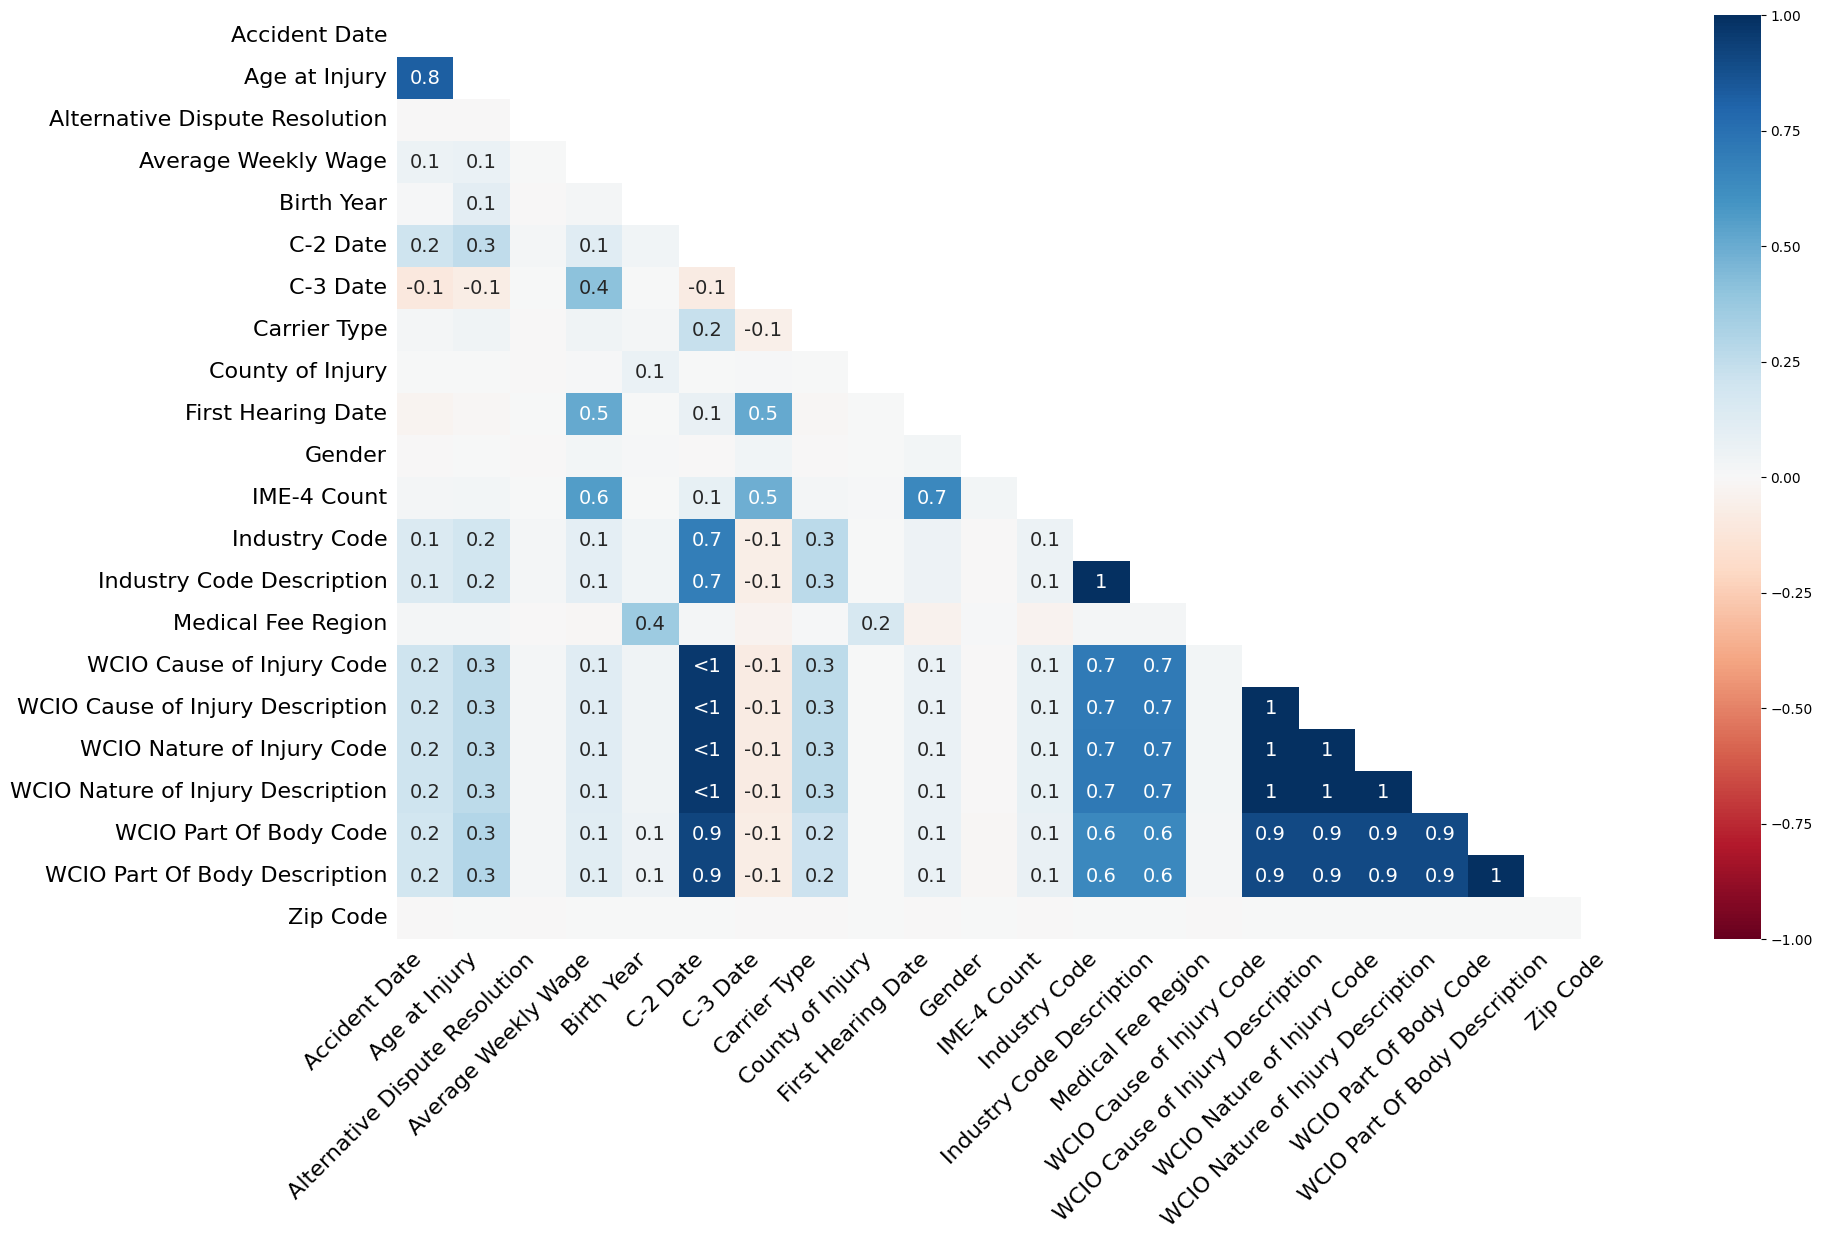

In [78]:
msno.heatmap(WCB)

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    IME-4 Count
</div>

> Given that the IME-4 Count refers to the number of "Independent Examiner's Report of Independent Medical Examination" forms received, we consider that it makes sense that the missing values actually refer to none, since 0 was not present in the unique values. So we'll convert the missing values to zero.

In [79]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 20%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    First Hearing Date
</div>

> As stated in the project description, a blank date simply means that the hearing hasn't happened yet. We will keep it as NaT (Not a Time) for now and later create a boolean column during feature engineering to represent this condition.

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 25%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    C-3 Date and C-2 Date
</div>

> As we saw before, it only makes sense for the C-2 Date to follow the Accident Date. Therefore, in cases where this is not true, we will assume that the Accident Date is correct and impute a new value for the C-2 Date. This new C-2 Date will be set to the Accident Date plus a certain number of days, corresponding to the median time difference (in days) between the Accident Date and C-2 Date, calculated only for X_train and cases where the Accident Date is earlier than the C-2 Date.

In [80]:
valid_dates_train = (X_train['Accident Date'] <= X_train['C-2 Date'])
valid_dates_val = (X_val['Accident Date'] <= X_val['C-2 Date'])

invalid_entries_train = X_train[~valid_dates_train & X_train['C-2 Date'].notna() & X_train['Accident Date'].notna()]
invalid_entries_val = X_val[~valid_dates_val & X_val['C-2 Date'].notna() & X_val['Accident Date'].notna()]

print("X_train:", invalid_entries_train.shape[0])
print("X_val:", invalid_entries_val.shape[0])

X_train: 113
X_val: 52


In [81]:
X_train['Date Difference'] = X_train.apply(
    lambda row: row['C-2 Date'] - row['Accident Date'] if row['C-2 Date'] > row['Accident Date'] else pd.NaT, axis=1
)

# Calculate the median of the differences in days for X_train
median_difference = X_train['Date Difference'].dropna().median().days

# Create the condition where Accident Date > C-2 Date and dates are not missing
condition_train = (X_train['Accident Date'] > X_train['C-2 Date']) & (X_train['C-2 Date'].notna() & X_train['Accident Date'].notna())
condition_val = (X_val['Accident Date'] > X_val['C-2 Date']) & (X_val['C-2 Date'].notna() & X_val['Accident Date'].notna())

# Impute C-2 Date
X_train.loc[condition_train, 'C-2 Date'] = X_train.loc[condition_train, 'Accident Date'] + pd.Timedelta(days=median_difference)
X_val.loc[condition_val, 'C-2 Date'] = X_val.loc[condition_val, 'Accident Date'] + pd.Timedelta(days=median_difference)

X_train = X_train.drop(columns=['Date Difference'])

In [82]:
valid_dates_train = (X_train['Accident Date'] <= X_train['C-2 Date'])
valid_dates_val = (X_val['Accident Date'] <= X_val['C-2 Date'])

invalid_entries_train = X_train[~valid_dates_train & X_train['C-2 Date'].notna() & X_train['Accident Date'].notna()]
invalid_entries_val = X_val[~valid_dates_val & X_val['C-2 Date'].notna() & X_val['Accident Date'].notna()]

print("X_train:", invalid_entries_train.shape[0])
print("X_val:", invalid_entries_val.shape[0])

X_train: 0
X_val: 0


Now for C-3 Date:

In [83]:
valid_dates_train = (X_train['Accident Date'] <= X_train['C-3 Date'])
valid_dates_val = (X_val['Accident Date'] <= X_val['C-3 Date'])

invalid_entries_train = X_train[~valid_dates_train & X_train['C-3 Date'].notna() & X_train['Accident Date'].notna()]
invalid_entries_val = X_val[~valid_dates_val & X_val['C-3 Date'].notna() & X_val['Accident Date'].notna()]

print("X_train:", invalid_entries_train.shape[0])
print("X_val:", invalid_entries_val.shape[0])

X_train: 820
X_val: 392


In [84]:
X_train['Date Difference'] = X_train.apply(
    lambda row: row['C-3 Date'] - row['Accident Date'] if row['C-3 Date'] > row['Accident Date'] else pd.NaT, axis=1
)

# Calculate the median of the differences in days
median_difference = X_train['Date Difference'].dropna().median().days

# Create the condition where Accident Date > C-3 Date and C-3 Date is not missing
condition_train = (X_train['Accident Date'] > X_train['C-3 Date']) & (X_train['C-3 Date'].notna() & X_train['Accident Date'].notna())
condition_val = (X_val['Accident Date'] > X_val['C-3 Date']) & (X_val['C-3 Date'].notna() & X_val['Accident Date'].notna())

# Impute C-3 Date
X_train.loc[condition_train, 'C-3 Date'] = X_train.loc[condition_train, 'Accident Date'] + pd.Timedelta(days=median_difference)
X_val.loc[condition_val, 'C-3 Date'] = X_val.loc[condition_val, 'Accident Date'] + pd.Timedelta(days=median_difference)

X_train = X_train.drop(columns=['Date Difference'])

In [85]:
valid_dates_train = (X_train['Accident Date'] <= X_train['C-3 Date'])
valid_dates_val = (X_val['Accident Date'] <= X_val['C-3 Date'])

invalid_entries_train = X_train[~valid_dates_train & X_train['C-3 Date'].notna() & X_train['Accident Date'].notna()]
invalid_entries_val = X_val[~valid_dates_val & X_val['C-3 Date'].notna() & X_val['Accident Date'].notna()]

print("X_train:", invalid_entries_train.shape[0])
print("X_val:", invalid_entries_val.shape[0])

X_train: 0
X_val: 0


> C-3 Date refers to the date that the Employee Claim Form was received, given the large percentage of missing values (67%), we've decided to assume that the blank values mean that there was no form received. <br> <br>
C-2 Date indicates the date of receipt of the Employer's Report of Work-Related Injury/Illness. Similarly, we will assume that any missing values reflect the absence of a report, and we will keep these entries as NaT (Not a Time).

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>7. Future: </strong> <br>
1. Leave as Missing <br>
2. Impute with a Future Date <br>
3. Flagging Missing Values <br>
</div>

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 25%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Average Weekly Wage
</div>

> We decided to use the median to impute the missing values of AWW.

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>8. Future: </strong> <br>
Or predictive imputing, maybe based on the Industry Code. <br>
We could create buckets and the probability of being in those buckets to impute in this way.
</div>

In [86]:
WCB['Average Weekly Wage'].describe()

count    2.099250e+05
mean     1.275824e+03
std      9.769572e+03
min      1.394000e+01
25%      7.002300e+02
50%      1.068940e+03
75%      1.578180e+03
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [87]:
AWW_median_train = X_train['Average Weekly Wage'].median()
print(f'The median AWW is: {AWW_median_train}')

X_train.loc[X_train['Average Weekly Wage'].isna(), 'Average Weekly Wage'] = AWW_median_train
X_val.loc[X_val['Average Weekly Wage'].isna(), 'Average Weekly Wage'] = AWW_median_train

The median AWW is: 1068.045


<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 10%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Birth Year
</div>

> There are cases where we can calculate the Birth Year deterministically, assuming a margin of error of 1 year due to not knowing whether the person had their birthday that year at the time of the accident. However, this should not significantly affect the overall analysis. <br>
The rest that is missing we will fill with the median.

In [88]:
WCB[(WCB['Birth Year'].isna()) & (WCB['Accident Date'].notna()) & (WCB['Age at Injury'].notna())].shape[0]
# Birth Year is missing: 54159 rows
# Birth Year is missing and Accident Date not missing: 53655 rows
# Birth Year is missing, Accident Date and Age at Injury not missing: 51973 rows

51973

In [89]:
# Rows to replace
filtered_rows_train =X_train[(X_train['Birth Year'].isna()) & (X_train['Accident Date'].notna()) & (X_train['Age at Injury'].notna())]

X_train.loc[filtered_rows_train.index, 'Birth Year'] = (
    X_train.loc[filtered_rows_train.index, 'Accident Date'].dt.year - X_train.loc[filtered_rows_train.index, 'Age at Injury']
)

In [90]:
filtered_rows_val= X_val[(X_val['Birth Year'].isna()) & (X_val['Accident Date'].notna()) & (X_val['Age at Injury'].notna())]

X_val.loc[filtered_rows_val.index, 'Birth Year'] = (
    X_val.loc[filtered_rows_val.index, 'Accident Date'].dt.year - X_val.loc[filtered_rows_val.index, 'Age at Injury']
)

In [91]:
X_train[(X_train['Birth Year'].isna())].shape[0]

1516

In [92]:
# Calculate the median of Birth Year
birth_median_train= X_train['Birth Year'].median()
print(f'The median Birth Year in training data is: {birth_median_train}')

#Impute missing values
X_train.loc[X_train['Birth Year'].isna(),'Birth Year']= birth_median_train
X_val.loc[X_val['Birth Year'].isna(), 'Birth Year'] = birth_median_train

The median Birth Year in training data is: 1978.0


In [93]:
X_val[(X_val['Birth Year'].isna())].shape[0]

0

In [94]:
X_train[(X_train['Birth Year'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 20%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Medical Fee Region
</div>

> We believe that "Unknown" indicates a failure to fill in the region. For this reason, we will impute the missing values using a proportional allocation based on the distribution of known values within the "Medical Fee Region."

In [95]:
missing_count_train = X_train['Medical Fee Region'].isna().sum()
missing_count_val = X_val['Medical Fee Region'].isna().sum()
missing_count_train, missing_count_val

(np.int64(23325), np.int64(10147))

In [96]:
percentage_region = X_train['Medical Fee Region'].value_counts(normalize=True) * 100
percentage_region

Medical Fee Region
IV     49.241463
I      25.153768
II     15.671137
III     9.933631
Name: proportion, dtype: float64

In [97]:
# Regions and their corresponding proportions
regions = ['IV','I','II','III']
proportions = [0.49241463,0.25153768,0.15671137,0.09933631]

# Sample from regions based on proportions in X_train
imputed_values_train = np.random.choice(regions, size=missing_count_train, p=proportions)
imputed_values_val = np.random.choice(regions, size=missing_count_val, p=proportions)

# Fill the missing values
X_train.loc[X_train['Medical Fee Region'].isna(), 'Medical Fee Region'] = imputed_values_train
X_val.loc[X_val['Medical Fee Region'].isna(), 'Medical Fee Region'] = imputed_values_val

In [98]:
X_train[(X_train['Medical Fee Region'].isna())].shape[0]

0

In [99]:
X_val[(X_val['Medical Fee Region'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 10%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Zip Code
</div>

> We don’t anticipate that this variable will be highly relevant to the model. In the absence of a better option, we will, for now, impute the missing values with "Unknown".

In [100]:
X_train.fillna({'Zip Code':'UNKNOWN'}, inplace=True)
X_val.fillna({'Zip Code':'UNKNOWN'}, inplace=True)

In [101]:
unique_zip_codes = X_train['Zip Code'].nunique()
non_missing_zip_codes = X_train['Zip Code'].notna().sum()

unique_zip_codes, non_missing_zip_codes

(7075, np.int64(401817))

In [102]:
X_train[(X_train['Zip Code'].isna())].shape[0]

0

In [103]:
X_val[(X_val['Zip Code'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 40%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    WCIO Part Of Body Code & Description
</div>


> We already know from the heatmap and the calculations below that the cases with missing "Part of Body Code" correspond to the same instances where the "WCIO Part of Body Description" is also absent. Additionally, in 14,763 cases, both the "WCIO Cause of Injury Code" and its description, as well as the "WCIO Part Of Body Code" and its description, and the "WCIO Nature of Injury Code" and its description are missing. For these 14,763 cases with missing values across these categories, we will impute the code as 100 and the description as "Unknown." We suspect that these cases may represent instances where no workplace accident occurred or where there is insufficient information regarding these claims.

In [104]:
#WCB[(WCB['WCIO Part Of Body Description'].isna()) &  (WCB['WCIO Part Of Body Code'].isna()) ].shape[0]
WCB[(WCB['WCIO Cause of Injury Description'].isna()) & (WCB['WCIO Part Of Body Code'].isna()) & (WCB['WCIO Nature of Injury Description'].isna())].shape[0]

#17081 rows where WCIO Part Of Body Description is missing
#17081 rows where WCIO Part Of Body Code is missing
#17081 rows where WCIO Part Of Body Code and WCIO Part Of Body Description are missing

#15656 rows where WCIO Nature of Injury Description is missing
#15656 rows where WCIO Nature of Injury Code is missing
#15656 rows where WCIO Nature of Injury Code and WCIO Nature of Injury Description are missing
#14764 rows where WCIO Part Of Body Code and Description and WCIO Nature of Injury Code and Description are missing

#15639 rows where WCIO Cause of Injury Code is missing
#15639 rows where WCIO Cause of Injury Description is missing
#15639 rows where WCIO Cause of Injury Description and WCIO Cause of Injury Code are missing
#15593 rows where WCIO Cause of Injury Code and Description and WCIO Nature of Injury Code and Description are missing
#14763 rows where WCIO Cause of Injury Code and Description and WCIO Part Of Body Code and Description are missing
#14763 rows where WCIO Cause of Injury Code and Description and WCIO Part Of Body Code and Description and WCIO Nature of Injury Code and Description are missing

14763

In [105]:
missing_condition_train = (
    X_train['WCIO Part Of Body Code'].isna() & X_train['WCIO Part Of Body Description'].isna() &
    X_train['WCIO Cause of Injury Code'].isna() & X_train['WCIO Cause of Injury Description'].isna() &
    X_train['WCIO Nature of Injury Code'].isna() & X_train['WCIO Nature of Injury Description'].isna()
)

missing_condition_val = (
    X_val['WCIO Part Of Body Code'].isna() & X_val['WCIO Part Of Body Description'].isna() &
    X_val['WCIO Cause of Injury Code'].isna() & X_val['WCIO Cause of Injury Description'].isna() &
    X_val['WCIO Nature of Injury Code'].isna() & X_val['WCIO Nature of Injury Description'].isna()
)

default_value_code = 100
default_value_desc = "Unknown"

X_train.loc[missing_condition_train, 'WCIO Part Of Body Code'] = default_value_code
X_train.loc[missing_condition_train, 'WCIO Cause of Injury Code'] = default_value_code
X_train.loc[missing_condition_train, 'WCIO Nature of Injury Code'] = default_value_code

X_train.loc[missing_condition_train, 'WCIO Part Of Body Description'] = default_value_desc
X_train.loc[missing_condition_train, 'WCIO Cause of Injury Description'] = default_value_desc
X_train.loc[missing_condition_train, 'WCIO Nature of Injury Description'] = default_value_desc

X_val.loc[missing_condition_val, 'WCIO Part Of Body Code'] = default_value_code
X_val.loc[missing_condition_val, 'WCIO Cause of Injury Code'] = default_value_code
X_val.loc[missing_condition_val, 'WCIO Nature of Injury Code'] = default_value_code

X_val.loc[missing_condition_val, 'WCIO Part Of Body Description'] = default_value_desc
X_val.loc[missing_condition_val, 'WCIO Cause of Injury Description'] = default_value_desc
X_val.loc[missing_condition_val, 'WCIO Nature of Injury Description'] = default_value_desc

In [106]:
X_train[(X_train['WCIO Part Of Body Description'].isna())].shape[0]

1614

In [107]:
X_val[(X_val['WCIO Part Of Body Description'].isna()) ].shape[0]

704

We still have some Nan to impute.

In [108]:
X_train[(X_train['WCIO Part Of Body Description'].isna()) &  (X_train['WCIO Cause of Injury Description'].notna())].shape[0]

1614

> For the remaining cases where both the "WCIO Part Of Body Code" and its description are missing, we believe there may have been a system error that resulted in the loss of these values. Therefore, we will impute the most common "Part Of Body Code" corresponding to the respective "Cause of Injury Code" for each of these cases.

In [109]:
# DataFrame to hold the most common Part Of Body Code for each Cause of Injury Code
common_body_code_train = (
    X_train[X_train['WCIO Part Of Body Code'].notna()]  # Focus on valid part of body codes
    .groupby('WCIO Cause of Injury Code')['WCIO Part Of Body Code']
    .agg(lambda x: x.value_counts().idxmax() if not x.empty else None)  # Get the most common value
    .reset_index()
)

common_body_code_train.columns = ['WCIO Cause of Injury Code','Most Common Part Of Body Code']

print("Most Common Part Of Body Code for each WCIO Cause of Injury Code (Training Set):")
print(common_body_code_train)      

# save the original index to assign it back after merges
X_train_original_index = X_train.index
X_val_original_index = X_val.index

# Merge this information back into the original DataFrame to fill in the missing values
X_train = X_train.merge(common_body_code_train, on='WCIO Cause of Injury Code', how='left')
X_train.loc[X_train['WCIO Part Of Body Code'].isna(),'WCIO Part Of Body Code']= X_train['Most Common Part Of Body Code']
X_train.drop(columns='Most Common Part Of Body Code', inplace=True) #Remove the 'Most Common Part Of Body Code'

#Doing the same for validation set
X_val = X_val.merge(common_body_code_train, on='WCIO Cause of Injury Code', how='left')
X_val.loc[X_val['WCIO Part Of Body Code'].isna(), 'WCIO Part Of Body Code']= X_val['Most Common Part Of Body Code']
X_val.drop(columns='Most Common Part Of Body Code', inplace=True)

Most Common Part Of Body Code for each WCIO Cause of Injury Code (Training Set):
    WCIO Cause of Injury Code  Most Common Part Of Body Code
0                         1.0                           14.0
1                         2.0                           35.0
2                         3.0                           91.0
3                         4.0                           35.0
4                         5.0                           35.0
..                        ...                            ...
73                       96.0                           48.0
74                       97.0                           35.0
75                       98.0                           90.0
76                       99.0                           90.0
77                      100.0                          100.0

[78 rows x 2 columns]


In [110]:
X_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
0,2022-02-19,60.0,N,2022-03-05,N,986.840,1962.0,2022-03-04,2022-03-10,NYU LANGONE HOSPITALS,4A. SELF PRIVATE,NEW YORK,N,NYC,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,10031,0.0,6
1,2021-11-20,23.0,N,2021-12-01,N,284.900,1998.0,2021-12-01,NaT,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,N,NYC,NaT,M,0.0,51.0,INFORMATION,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11590,0.0,3
2,2022-04-29,39.0,N,2022-05-10,N,1567.830,1983.0,2022-05-10,NaT,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaT,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,80.0,OBJECT HANDLED BY OTHERS,10.0,CONTUSION,18.0,SOFT TISSUE,12603,0.0,3
3,2021-01-20,59.0,N,2021-02-23,N,1068.045,1962.0,2021-02-22,2021-02-24,CHARTER OAK FIRE INS CO,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",40.0,MULTIPLE TRUNK,11717,0.0,1
4,2020-10-26,48.0,N,2020-11-10,Y,1971.570,1972.0,2021-02-27,2020-10-29,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,ORANGE,N,ALBANY,NaT,M,1.0,92.0,PUBLIC ADMINISTRATION,III,89.0,PERSON IN ACT OF A CRIME,10.0,CONTUSION,31.0,UPPER ARM,10940,0.0,2


In [111]:
X_train[(X_train['WCIO Part Of Body Code'].isna()) ].shape[0]

0

In [112]:
X_train[(X_train['WCIO Part Of Body Description'].isna()) ].shape[0]

1614

> Now that we have filled in all the WCIO Part Of Body Code values, it becomes straightforward to populate the WCIO Part Of Body Description as well. By establishing a mapping between the codes and their corresponding descriptions, we can efficiently fill in any missing values.

In [113]:
# DataFrame with unique WCIO Part Of Body Codes and their descriptions (without missing descriptions)
body_code_description_train = X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()
body_code_description_train = body_code_description_train[body_code_description_train['WCIO Part Of Body Description'].notna()]

# Dictionary to map WCIO Part Of Body Code to its description
description_dict = dict(zip(body_code_description_train['WCIO Part Of Body Code'], body_code_description_train['WCIO Part Of Body Description']))

# Fill missing descriptions in X_train and X_val using the mapping
X_train['WCIO Part Of Body Description'] = X_train['WCIO Part Of Body Description'].fillna(X_train['WCIO Part Of Body Code'].map(description_dict))

X_val['WCIO Part Of Body Description'] = X_val['WCIO Part Of Body Description'].fillna(X_val['WCIO Part Of Body Code'].map(description_dict))

In [114]:
X_train[X_train['WCIO Part Of Body Description'].isna()].shape[0]

0

In [115]:
X_val[X_val['WCIO Part Of Body Description'].isna()].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 40%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    WCIO Nature of Injury Code & Description
</div>

In [116]:
X_train[(X_train['WCIO Nature of Injury Description'].isna()) & (X_train['WCIO Nature of Injury Code'].isna())].shape[0]
#649 rows in X_train where WCIO Nature of Injury Code is missing
#649 rows in X_train where WCIO Nature of Injury Description is missing
#649 rows in X_train where WCIO Nature of Injury Description and WCIO Nature of Injury Code are missing


649

In [117]:
X_train[(X_train['WCIO Nature of Injury Description'].isna()) & (X_train['WCIO Nature of Injury Code'].isna()) & (X_train['WCIO Part Of Body Code'].notna())].shape[0]

649

In [118]:
# DataFrame to hold the most common Nature of Injury Code for each Part of Body Code
common_nature_code_train = (
    X_train[X_train['WCIO Nature of Injury Code'].notna()]  # Focus on valid nature of injury codes
    .groupby('WCIO Part Of Body Code')['WCIO Nature of Injury Code']
    .agg(lambda x: x.value_counts().idxmax() if not x.empty else None)  # Get the most common value
    .reset_index()
)

common_nature_code_train.columns = ['WCIO Part Of Body Code','Most Common Nature of Injury Code']

print("Most Common Nature of Injury Code for each WCIO Part of Body Code (Training Set):")
print(common_nature_code_train)      

# Merge this information back into the original DataFrame to fill in the missing values
X_train = X_train.merge(common_nature_code_train, on='WCIO Part Of Body Code', how='left')

X_train.loc[X_train['WCIO Nature of Injury Code'].isna(), 'WCIO Nature of Injury Code'] = X_train['Most Common Nature of Injury Code']

X_train.drop(columns='Most Common Nature of Injury Code', inplace=True) #Remove the 'Most Common Nature of Injury Code'

# Doing the same for validation set
X_val = X_val.merge(common_nature_code_train, on='WCIO Part Of Body Code', how='left')
X_val.loc[X_val['WCIO Nature of Injury Code'].isna(), 'WCIO Nature of Injury Code'] = X_val['Most Common Nature of Injury Code']
X_val.drop(columns='Most Common Nature of Injury Code', inplace=True)

Most Common Nature of Injury Code for each WCIO Part of Body Code (Training Set):
    WCIO Part Of Body Code  Most Common Nature of Injury Code
0                     10.0                               10.0
1                     11.0                               10.0
2                     12.0                                7.0
3                     13.0                               31.0
4                     14.0                               25.0
5                     15.0                               10.0
6                     16.0                               28.0
7                     17.0                               40.0
8                     18.0                               10.0
9                     19.0                               10.0
10                    20.0                               52.0
11                    21.0                               52.0
12                    22.0                               52.0
13                    23.0                        

In [119]:
X_train[(X_train['WCIO Nature of Injury Code'].isna())].shape[0]

0

In [120]:
X_train[(X_train['WCIO Nature of Injury Description'].isna())].shape[0]

649

In [121]:
# DataFrame with unique WCIO Nature of Injury Codes and their descriptions (in X_train and without missing descriptions)
nature_code_description_train = X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()
nature_code_description_train = nature_code_description_train[nature_code_description_train['WCIO Nature of Injury Description'].notna()]

# Dictionary to map WCIO Nature of Injury Code to its description
description_dict = dict(zip(nature_code_description_train['WCIO Nature of Injury Code'], nature_code_description_train['WCIO Nature of Injury Description']))

# Fill missing descriptions in the original DataFrame using the mapping
X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Description'].fillna(X_train['WCIO Nature of Injury Code'].map(description_dict))
X_val['WCIO Nature of Injury Description'] = X_val['WCIO Nature of Injury Description'].fillna(X_val['WCIO Nature of Injury Code'].map(description_dict))


In [122]:
X_train[(X_train['WCIO Nature of Injury Description'].isna())].shape[0]

0

In [123]:
X_val[(X_val['WCIO Nature of Injury Description'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 40%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    WCIO Cause of Injury Code & Description
</div>

In [124]:
X_train[(X_train['WCIO Cause of Injury Code'].isna()) & (X_train['WCIO Cause of Injury Description'].isna()) ].shape[0]
#633 rows in X_train where WCIO Cause of Injury Code is missing
#633 rows in X_train where WCIO Cause of Injury Description is missing
#633 rows in X_train where WCIO Cause of Injury Description and WCIO Cause of Injury Code are missing

633

In [125]:
X_train[(X_train['WCIO Cause of Injury Code'].isna()) & (X_train['WCIO Cause of Injury Description'].isna()) & (X_train['WCIO Part Of Body Code'].notna())].shape[0]

633

In [126]:
# DataFrame to hold the most common Cause of Injury Code for each Part of Body Code in X_train
common_cause_code_train = (
    X_train[X_train['WCIO Cause of Injury Code'].notna()]  # Focus on valid cause of injury codes
    .groupby('WCIO Part Of Body Code')['WCIO Cause of Injury Code']
    .agg(lambda x: x.value_counts().idxmax() if not x.empty else None)  # Get the most common value
    .reset_index()
)

common_cause_code_train.columns = ['WCIO Part Of Body Code', 'Most Common Cause of Injury Code']

print("Most Common Cause of Injury Code for each WCIO Part of Body Code (X_train):")
print(common_cause_code_train)      

# Merge this information back into X_train and X_val to fill in the missing values
X_train = X_train.merge(common_cause_code_train, on='WCIO Part Of Body Code', how='left')

X_train.loc[X_train['WCIO Cause of Injury Code'].isna(), 'WCIO Cause of Injury Code'] = X_train['Most Common Cause of Injury Code']

X_train.drop(columns='Most Common Cause of Injury Code', inplace=True)  #Remove the 'Most Common Cause of Injury Code'

# Doing the same for X_val
X_val = X_val.merge(common_cause_code_train, on='WCIO Part Of Body Code', how='left')
X_val.loc[X_val['WCIO Cause of Injury Code'].isna(), 'WCIO Cause of Injury Code'] = X_val['Most Common Cause of Injury Code']
X_val.drop(columns='Most Common Cause of Injury Code', inplace=True)  # Remove the helper column

Most Common Cause of Injury Code for each WCIO Part of Body Code (X_train):
    WCIO Part Of Body Code  Most Common Cause of Injury Code
0                     10.0                              75.0
1                     11.0                              68.0
2                     12.0                              99.0
3                     13.0                              52.0
4                     14.0                              87.0
5                     15.0                              74.0
6                     16.0                              79.0
7                     17.0                              74.0
8                     18.0                              74.0
9                     19.0                              74.0
10                    20.0                              45.0
11                    21.0                              56.0
12                    22.0                              56.0
13                    23.0                              56.0
14       

In [127]:
X_train[(X_train['WCIO Cause of Injury Code'].isna())].shape[0]

0

In [128]:
X_train[(X_train['WCIO Cause of Injury Description'].isna())].shape[0]

633

In [129]:
# DataFrame with unique WCIO Cause of Injury Codes and their descriptions (in X_train and without missing descriptions)
cause_code_description_train = X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()
cause_code_description_train = cause_code_description_train[cause_code_description_train['WCIO Cause of Injury Description'].notna()]

# Dictionary to map WCIO Cause of Injury Code to its description (based on X_train)
description_dict_train = dict(zip(cause_code_description_train['WCIO Cause of Injury Code'], cause_code_description_train['WCIO Cause of Injury Description']))

# Fill missing descriptions in X_train and X_val using the mapping
X_train['WCIO Cause of Injury Description'] = X_train['WCIO Cause of Injury Description'].fillna(X_train['WCIO Cause of Injury Code'].map(description_dict_train))
X_val['WCIO Cause of Injury Description'] = X_val['WCIO Cause of Injury Description'].fillna(X_val['WCIO Cause of Injury Code'].map(description_dict_train))

In [130]:
X_train[(X_train['WCIO Nature of Injury Description'].isna())].shape[0]

0

In [131]:
X_val[(X_val['WCIO Nature of Injury Description'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 30%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Industry Code & Description
</div>

In [132]:
X_train[(X_train['Industry Code Description'].isna()) & (X_train['Industry Code'].isna())].shape[0]

#6949 rows in X_train where Industry Code is missing
#6949 rows in X_train where Industry Code Description is missing
#6949 rows in X_train where Industry Code and Industry CodeDescription are missing 

6949

In [133]:
# Top 10 Industry Code frequencies in X_train
top_10_industry_codes_train = X_train['Industry Code'].value_counts(normalize=True).head(10) * 100

# Calculate relative percentages within the top 10 as 100%
top_10_relative_train = (top_10_industry_codes_train/top_10_industry_codes_train.sum()) * 100
print(top_10_relative_train)

Industry Code
62.0    25.701216
92.0    20.765757
61.0     9.943094
44.0     9.746779
48.0     8.383802
23.0     6.941914
72.0     5.919601
56.0     4.704822
45.0     4.049797
33.0     3.843218
Name: proportion, dtype: float64


In [134]:
# Count the number of missing values in the Industry Code column for X_train and X_val
missing_count_train = X_train['Industry Code'].isnull().sum()
missing_count_val = X_val['Industry Code'].isnull().sum()

# Define industry codes and corresponding proportions (based on X_train)
industries_train = [62, 92, 61, 44,48, 23, 72, 56, 45, 33]
proportions_train = [0.25701216, 0.20765757,0.09943094,  0.09746779, 0.08383802, 0.06941914, 0.05919601,0.04704822, 0.04049797, 0.03843218]

# Generate imputed values based on proportions for the missing count
imputed_values_train= np.random.choice(industries_train, size=missing_count_train, p=proportions_train)
imputed_values_val= np.random.choice(industries_train, size=missing_count_val, p=proportions_train)

# Fill the missing values in the 'Industry Code' column
X_train.loc[X_train['Industry Code'].isnull(), 'Industry Code'] = imputed_values_train
X_val.loc[X_val['Industry Code'].isnull(), 'Industry Code'] = imputed_values_val

In [135]:
X_train[(X_train['Industry Code'].isna())].shape[0]

0

In [136]:
X_train[(X_train['Industry Code Description'].isna())].shape[0]

6949

In [137]:
# DataFrame with unique Industry Codes and their descriptions (in X_train and without missing descriptions)
industry_code_description_train = X_train[['Industry Code', 'Industry Code Description']].drop_duplicates()
industry_code_description_train = industry_code_description_train[industry_code_description_train['Industry Code Description'].notna()]

# Dictionary to map Industry Code to its description
description_dict_train = dict(zip(industry_code_description_train['Industry Code'], industry_code_description_train['Industry Code Description']))

# Fill missing descriptions in X_train using the mapping
X_train['Industry Code Description'] = X_train['Industry Code Description'].fillna(X_train['Industry Code'].map(description_dict_train))
X_val['Industry Code Description'] = X_val['Industry Code Description'].fillna(X_val['Industry Code'].map(description_dict_train))

In [138]:
X_train[(X_train['Industry Code Description'].isna())].shape[0]

0

In [139]:
X_val[(X_val['Industry Code Description'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Age at Injury
</div>

> There are cases where we can calculate the Age at Injury deterministically, assuming a margin of error of 1 year due to not knowing whether the person had their birthday that year at the time of the accident. However, this should not significantly affect the overall analysis.

In [140]:
X_train[(X_train['Age at Injury'].isna()) & (X_train['Accident Date'].notna())].shape[0]
# Age at Injury is missing (in X_train): 3800 rows
# Age at Injury is missing and Accident Date not missing (in X_train): 1220 rows

1220

In [141]:
# Rows to replace
filtered_rows_train = X_train[(X_train['Age at Injury'].isna()) & (X_train['Accident Date'].notna())]

# Calculate and replace Age at Injury in X_train
X_train.loc[filtered_rows_train.index, 'Age at Injury'] = (
    X_train.loc[filtered_rows_train.index, 'Accident Date'].dt.year - X_train.loc[filtered_rows_train.index, 'Birth Year']
)

#Repeat the process for X_val
filtered_rows_val = X_val[(X_val['Age at Injury'].isna()) & (X_val['Accident Date'].notna())]

X_val.loc[filtered_rows_val.index, 'Age at Injury'] = (
    X_val.loc[filtered_rows_val.index, 'Accident Date'].dt.year - X_val.loc[filtered_rows_val.index, 'Birth Year']
)

In [142]:
# Calculate the difference in days for X_train
X_train['Date Difference'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

# Compute the median and mean of the difference in days for X_train
median_diff_train = X_train['Date Difference'].median()
mean_diff_train = X_train['Date Difference'].mean()

median_diff_train, mean_diff_train

(np.float64(10.0), np.float64(82.57094157104677))

In [143]:
X_train = X_train.drop(columns=['Date Difference'])

> Since both the mean and median of the number of days between the Assembly Date and Accident Date are well below one year, we will use the year from the Assembly Date along with the Birth Year to calculate any remaining missing values for Age at Injury.

In [144]:
# Rows to replace in X_train
filtered_rows_train = X_train[(X_train['Age at Injury'].isna()) & (X_train['Accident Date'].isna()) & (X_train['Assembly Date'].notna())]

# Calculate and replace Age at Injury in X_train
X_train.loc[filtered_rows_train.index, 'Age at Injury'] = (
    X_train.loc[filtered_rows_train.index, 'Assembly Date'].dt.year - X_train.loc[filtered_rows_train.index, 'Birth Year']
)

# Doing the same for X_val
filtered_rows_val = X_val[(X_val['Age at Injury'].isna()) & (X_val['Accident Date'].isna()) & (X_val['Assembly Date'].notna())]

X_val.loc[filtered_rows_val.index, 'Age at Injury'] = (
    X_val.loc[filtered_rows_val.index, 'Assembly Date'].dt.year - X_train['Birth Year'].iloc[0]
)

In [145]:
X_train[(X_train['Age at Injury'].isna())].shape[0]

0

In [146]:
X_val[(X_val['Age at Injury'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 10%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
   Gender
</div>

#### 4.1. Gender

> We believe that "Unknown" indicates an omission in filling out the gender field. Therefore, we applied the same imputation technique used for the "Medical Fee Region".

In [148]:
missing_count_val = X_val['Gender'].isnull().sum()
missing_count_val

np.int64(1355)

In [149]:
missing_count_train = X_train['Gender'].isnull().sum()
missing_count_train

np.int64(3356)

In [150]:
percentage_gender = X_train['Gender'].value_counts(normalize=True) * 100
percentage_gender

Gender
M    58.916933
F    41.074534
X     0.008533
Name: proportion, dtype: float64

In [ ]:
def impute_with_mode(df, target_column, group_column, unknown_values=['U', 'X']):
    """
    Imputes missing (NaN) or specified unknown values in a target column based on the most common value (mode) 
    within each group defined by another column.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The column in which to impute missing/unknown values.
    - group_column: The column to group by for determining the mode for imputation.
    - unknown_values: List of values to be considered as 'unknown' (default is ['Unknown']).
                      NaN values in the target column are also included and will be imputed.

    Returns:
    - DataFrame with imputed values in the target column. If the mode is empty, pd
    """
    # Standardize missing values in the target column by replacing all unknown values with NaN
    df[target_column] = df[target_column].replace(unknown_values, pd.NA)

    # Calculate the mode (most common value) of the target column for each group | if mode is empty, use pd.NA
    mode_by_group = df.groupby(group_column)[target_column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

    overall_mode = df[target_column].mode().iloc[0]

    # Impute missing values based on the mode of each group
    df[target_column] = df.apply(
        lambda row: mode_by_group[row[group_column]] if pd.isna(row[target_column]) else row[target_column],
        axis=1
    )

    # Impute if the mode is empty for a certain group with overall mode
    if df[target_column].isna().sum() > 0:
        print(f"Imputing {df[target_column].isna().sum()} missing values with overall mode: {overall_mode}")
        df[target_column] = df[target_column].fillna(overall_mode)

    return df

In [151]:
X_train = impute_with_mode(X_train, 'Gender', 'Industry Code', ['U','X'])

In [ ]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
0,2022-02-19,60.0,N,2022-03-05,N,986.840,1962.0,2022-03-04,2022-03-10,NYU LANGONE HOSPITALS,4A. SELF PRIVATE,NEW YORK,N,NYC,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,10031,0.0,6
1,2021-11-20,23.0,N,2021-12-01,N,284.900,1998.0,2021-12-01,NaT,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,N,NYC,NaT,M,0.0,51.0,INFORMATION,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11590,0.0,3
2,2022-04-29,39.0,N,2022-05-10,N,1567.830,1983.0,2022-05-10,NaT,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaT,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,80.0,OBJECT HANDLED BY OTHERS,10.0,CONTUSION,18.0,SOFT TISSUE,12603,0.0,3
3,2021-01-20,59.0,N,2021-02-23,N,1068.045,1962.0,2021-02-22,2021-02-24,CHARTER OAK FIRE INS CO,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",40.0,MULTIPLE TRUNK,11717,0.0,1
4,2020-10-26,48.0,N,2020-11-10,Y,1971.570,1972.0,2021-02-27,2020-10-29,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,ORANGE,N,ALBANY,NaT,M,1.0,92.0,PUBLIC ADMINISTRATION,III,89.0,PERSON IN ACT OF A CRIME,10.0,CONTUSION,31.0,UPPER ARM,10940,0.0,2


In [ ]:
# Assume 'Gender' contains missing values represented by NaN or 'Unknown'
# Replace 'Unknown' with NaN to standardize missing values
X_train['Gender'] = X_train['Gender'].replace('U', pd.NA)
X_train['Gender'] = X_train['Gender'].replace('X', pd.NA)

X_val['Gender'] = X_val['Gender'].replace('U', pd.NA)
X_val['Gender'] = X_val['Gender'].replace('X', pd.NA)

# Calculate the mode (most common value) of 'Gender' for each 'Industry Code'
gender_mode_by_industry = X_train.groupby('Industry Code')['Gender'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# # Use the calculated mode to fill missing values in 'Gender' based on 'Industry Code'
# X_train['Gender'] = X_train.apply(
#     lambda row: gender_mode_by_industry[row['Industry Code']] if pd.isna(row['Gender']) else row['Gender'],
#     axis=1
# )



# Use the calculated mode to fill missing values in 'Gender' based on 'Industry Code'
X_train['Gender'] = X_train.apply(
    lambda row: gender_mode_by_industry[row['Industry Code']] if pd.isna(row['Gender']) else row['Gender'],
    axis=1
)

/var/folders/nj/p20z0h9x3ssf6ll0_cdhh2yc0000gn/T/ipykernel_96900/2129994207.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_val['Gender'].replace('U', pd.NA, inplace=True)
/var/folders/nj/p20z0h9x3ssf6ll0_cdhh2yc0000gn/T/ipykernel_96900/2129994207.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [486]:
gender_mode_by_industry

Industry Code
11.0    M
21.0    M
22.0    M
23.0    M
31.0    M
32.0    M
33.0    M
42.0    M
44.0    M
45.0    F
48.0    M
49.0    M
51.0    M
52.0    M
53.0    M
54.0    F
55.0    M
56.0    M
61.0    F
62.0    F
71.0    M
72.0    M
81.0    M
92.0    M
Name: Gender, dtype: object

In [ ]:
# Genders and their corresponding proportions (from X_train)
genders= ['M','F','X']
proportions= [0.58916933,0.41074534,0.00008533]

# Sample from genders based on proportions
imputed_values_train = np.random.choice(genders, size=missing_count_train, p=proportions)
imputed_values_val = np.random.choice(genders, size=missing_count_val, p=proportions)

# Fill the missing values in X_train and X_val and fill X for now 
X_train.loc[X_train['Gender'].isnull() & X_train['Gender'] == "X", 'Gender'] = imputed_values_train
X_val.loc[X_val['Gender'].isnull(), 'Gender'] = imputed_values_val



In [385]:
X_train[(X_train['Gender'].isna())].shape[0]

0

In [386]:
X_val[(X_val['Gender'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Accident Date
</div>

In [387]:
X_train[(X_train['Accident Date'].isna())].shape[0]

2580

In [388]:
X_train[(X_train['Accident Date'].isna()) & (X_train['Assembly Date'].notna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
212,NaT,40.0,N,2021-05-17,N,1068.045,1981.0,NaT,2021-05-10,CORNELL UNIVERSITY,4A. SELF PRIVATE,TOMPKINS,N,BINGHAMTON,NaT,M,0.0,61.0,EDUCATIONAL SERVICES,I,100.0,Unknown,100.0,Unknown,100.0,Unknown,14850,0.0,1
215,NaT,74.0,N,2021-10-20,Y,1068.045,1947.0,2021-11-09,2021-10-14,BROOKDALE HOSPITAL MEDICAL CTR,4A. SELF PRIVATE,KINGS,N,NYC,2022-01-27,M,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,53.0,KNEE,11213,0.0,4
236,NaT,58.0,N,2021-03-12,Y,1068.045,1963.0,NaT,2021-03-08,TRINITY HEALTH CORPORATION,4A. SELF PRIVATE,SCHENECTADY,N,ALBANY,NaT,F,2.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,100.0,Unknown,100.0,Unknown,100.0,Unknown,12309,0.0,4
395,NaT,59.0,N,2021-05-04,Y,1068.045,1962.0,2021-05-19,2021-04-26,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,BRONX,N,NYC,NaT,F,0.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),10454,0.0,1
440,NaT,66.0,N,2022-03-15,Y,1068.045,1956.0,NaT,2022-03-11,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ERIE,N,BUFFALO,NaT,M,0.0,33.0,MANUFACTURING,I,100.0,Unknown,100.0,Unknown,100.0,Unknown,14141,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401004,NaT,37.0,N,2021-11-15,N,1068.045,1984.0,2021-11-22,2021-11-09,STATE INSURANCE FUND,2A. SIF,MONROE,N,ROCHESTER,NaT,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,1.0,NO PHYSICAL INJURY,66.0,NO PHYSICAL INJURY,UNKNOWN,0.0,1
401052,NaT,43.0,N,2021-02-01,Y,1068.045,1978.0,2021-05-14,2021-01-21,CHUBB INDEMNITY INS CO,1A. PRIVATE,NEW YORK,N,NYC,2021-06-14,M,0.0,51.0,INFORMATION,III,98.0,"CUMULATIVE, NOC",90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS,33042,0.0,5
401394,NaT,46.0,N,2022-05-05,Y,1068.045,1976.0,2024-04-12,2022-04-29,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,SUFFOLK,N,HAUPPAUGE,NaT,F,0.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,43.0,DISC,11729,0.0,2
401456,NaT,52.0,N,2021-11-26,Y,1068.045,1969.0,2023-04-26,2021-11-19,PHOENIX INSURANCE COMPANY,1A. PRIVATE,RICHMOND,N,NYC,2023-07-19,M,0.0,23.0,CONSTRUCTION,IV,52.0,CONTINUAL NOISE,72.0,LOSS OF HEARING,13.0,EAR(S),10312,1.0,1


In [389]:
# Difference between Assembly Date and Accident Date for X_train (only for valid cases)
X_train['Date Difference'] = X_train.apply(
    lambda row: row['Assembly Date'] - row['Accident Date'] if row['Assembly Date'] > row['Accident Date'] else pd.NaT, axis=1
)

# Calculate the median of the differences in days for X_train
median_difference_train = X_train['Date Difference'].dropna().median().days

# Condition to impute missing Accident Dates in X_train and X_val
condition_train = (X_train['Accident Date'].isna()) & (X_train['Assembly Date'].notna()) 
condition_val = (X_val['Accident Date'].isna()) & (X_val['Assembly Date'].notna())

# Impute Accident Date for X_train
X_train.loc[condition_train, 'Accident Date'] = X_train.loc[condition_train, 'Assembly Date'] - pd.Timedelta(days=median_difference_train)
X_val.loc[condition_val, 'Accident Date'] = X_val.loc[condition_val, 'Assembly Date'] - pd.Timedelta(days=median_difference_train)

X_train = X_train.drop(columns=['Date Difference'])

In [390]:
X_train[(X_train['Accident Date'].isna())].shape[0]

0

In [391]:
X_val[(X_val['Accident Date'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 15%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Carrier Type
</div>

> For the missing values in the "Carrier Type" variable, we decided to impute the most frequent "Carrier Type" based on the corresponding "Industry Code", as we believe that the area in which the worker operates impacts the "Carrier Type", especially in the USA.
Here, we can also see that there are "Carrier Name" entries labeled *** CARRIER UNDETERMINED ***. However, we will not take any action regarding these because we believe that, in a way, "Carrier Type" provides us with the same information.


<span style="color:red">
If we use the Carrier name be careful because this exists: *** CARRIER UNDETERMINED ***
    </b></span>

In [392]:
X_train[(X_train['Carrier Type'].isna())].head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
28,2019-12-26,58.0,N,2020-08-31,N,1068.045,1961.0,2020-09-18,2020-08-24,*** CARRIER UNDETERMINED ***,NaN,KINGS,N,STATEWIDE,2021-01-22,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS,UNKNOWN,0.0,2
199,2021-06-05,32.0,N,2021-06-23,N,1068.045,1989.0,NaT,2021-06-17,*** CARRIER UNDETERMINED ***,NaN,ERIE,N,BUFFALO,NaT,M,0.0,92.0,PUBLIC ADMINISTRATION,II,100.0,Unknown,100.0,Unknown,100.0,Unknown,14213,0.0,1
611,2020-10-31,35.0,N,2020-11-10,Y,1068.045,1985.0,2021-08-23,2020-11-03,*** CARRIER UNDETERMINED ***,NaN,QUEENS,N,STATEWIDE,2021-07-21,M,0.0,23.0,CONSTRUCTION,IV,59.0,USING TOOL OR MACHINERY,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",90.0,MULTIPLE BODY PARTS,11368,0.0,1
769,2022-02-07,36.0,N,2022-04-07,N,1068.045,1985.0,2022-04-07,2022-05-12,*** CARRIER UNDETERMINED ***,NaN,ORANGE,N,ALBANY,NaT,F,0.0,23.0,CONSTRUCTION,II,32.0,ON ICE OR SNOW,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),12550,0.0,1
778,2022-12-06,21.0,N,2022-12-30,N,1068.045,2001.0,NaT,2022-12-28,*** CARRIER UNDETERMINED ***,NaN,WESTCHESTER,N,NYC,NaT,F,0.0,92.0,PUBLIC ADMINISTRATION,III,100.0,Unknown,100.0,Unknown,100.0,Unknown,10701,0.0,3


In [393]:
# DataFrame to store the most common Carrier Type for each Industry Code
common_carrier_type_train = (
    X_train[X_train['Carrier Type'].notna()]  # Focus on valid Carrier Type values
    .groupby('Industry Code')['Carrier Type']
    .agg(lambda x: x.value_counts().idxmax() if not x.empty else None)  # Get the most common value
    .reset_index()
)

common_carrier_type_train.columns = ['Industry Code', 'Most Common Carrier Type']

print("Most Common Carrier Type for each Industry Code (Training Set):")
print(common_carrier_type_train)

# Merge the most common Carrier Type for each Industry Code back into the original DataFrame
X_train = X_train.merge(common_carrier_type_train, on='Industry Code', how='left')

# Fill missing Carrier Type values with the most common Carrier Type for the corresponding Industry Code
X_train.loc[X_train['Carrier Type'].isna(), 'Carrier Type'] = X_train['Most Common Carrier Type']

# Remove the helper column 'Most Common Carrier Type'
X_train.drop(columns='Most Common Carrier Type', inplace=True)

# Doing the same for the validation set (X_val)
X_val = X_val.merge(common_carrier_type_train, on='Industry Code', how='left')
X_val.loc[X_val['Carrier Type'].isna(), 'Carrier Type'] = X_val['Most Common Carrier Type']
X_val.drop(columns='Most Common Carrier Type', inplace=True)

Most Common Carrier Type for each Industry Code (Training Set):
    Industry Code Most Common Carrier Type
0            11.0                  2A. SIF
1            21.0              1A. PRIVATE
2            22.0         4A. SELF PRIVATE
3            23.0              1A. PRIVATE
4            31.0              1A. PRIVATE
5            32.0              1A. PRIVATE
6            33.0              1A. PRIVATE
7            42.0              1A. PRIVATE
8            44.0              1A. PRIVATE
9            45.0              1A. PRIVATE
10           48.0          3A. SELF PUBLIC
11           49.0              1A. PRIVATE
12           51.0              1A. PRIVATE
13           52.0              1A. PRIVATE
14           53.0              1A. PRIVATE
15           54.0              1A. PRIVATE
16           55.0              1A. PRIVATE
17           56.0              1A. PRIVATE
18           61.0          3A. SELF PUBLIC
19           62.0              1A. PRIVATE
20           71.0              1A

In [394]:
X_train[(X_train['Carrier Type'].isna())].shape[0]

0

In [395]:
X_val[(X_val['Carrier Type'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 20%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    County of Injury
</div>

> We will impute the missing values of "County of Injury" using the most common "County of Injury" for each "District Name" (WCB district office that oversees claims for that region or area of the state).

In [396]:
# DataFrame to store the most common County of Injury for each District Name
common_county_of_injury_train = (
    X_train[X_train['County of Injury'].notna()]  # Focus on valid County of Injury values
    .groupby('District Name')['County of Injury']
    .agg(lambda x: x.value_counts().idxmax() if not x.empty else None)  # Get the most common value
    .reset_index()
)

common_county_of_injury_train.columns = ['District Name', 'Most Common County of Injury']

print("Most Common County of Injury for each District Name (Training Set):")
print(common_county_of_injury_train)

# Merge the most common County of Injury for each District Name back into the original DataFrame
X_train = X_train.merge(common_county_of_injury_train, on='District Name', how='left')

# Fill missing County of Injury values with the most common County of Injury for the corresponding District Name
X_train.loc[X_train['County of Injury'].isna(), 'County of Injury'] = X_train['Most Common County of Injury']

# Remove the helper column 'Most Common County of Injury'
X_train.drop(columns='Most Common County of Injury', inplace=True)

# Doing the same for the validation set (X_val)
X_val = X_val.merge(common_county_of_injury_train, on='District Name', how='left')
X_val.loc[X_val['County of Injury'].isna(), 'County of Injury'] = X_val['Most Common County of Injury']
X_val.drop(columns='Most Common County of Injury', inplace=True)


# set back the index for X_train and X_val
X_train.set_index(X_train_original_index, inplace=True)
X_val.set_index(X_val_original_index, inplace=True)

Most Common County of Injury for each District Name (Training Set):
  District Name Most Common County of Injury
0        ALBANY                       ORANGE
1    BINGHAMTON                       BROOME
2       BUFFALO                         ERIE
3     HAUPPAUGE                      SUFFOLK
4           NYC                       QUEENS
5     ROCHESTER                       MONROE
6     STATEWIDE                       QUEENS
7      SYRACUSE                     ONONDAGA


In [397]:
X_train[(X_train['Carrier Type'].isna())].shape[0]

0

In [398]:
X_val[(X_val['Carrier Type'].isna())].shape[0]

0

<div style="background-color:#A4C8E1; padding: 15px; border-radius: 80px; color: white; width: 30%; margin: 20px auto 10px 5px; text-align: center; font-size: 1.5em; font-weight: bold;">
    Alternative Dispute Resolution	
</div>

> We applied the same imputation technique used for the "Medical Fee Region".

In [399]:
missing_count_val = X_val['Alternative Dispute Resolution'].isnull().sum()
missing_count_val

np.int64(2)

In [400]:
missing_count_train = X_train['Alternative Dispute Resolution'].isnull().sum()
missing_count_train

np.int64(3)

In [401]:
percentage_ADR_train = X_train['Alternative Dispute Resolution'].value_counts(normalize=True) * 100
percentage_ADR_train

Alternative Dispute Resolution
N    99.54581
Y     0.45419
Name: proportion, dtype: float64

In [402]:
# ADR and their corresponding proportions in X_train
ADR= ['N', 'Y']
proportions_train= X_train['Alternative Dispute Resolution'].value_counts(normalize=True).values

# Sample missing ADR values for X_train and X_val based on the calculated proportions
imputed_values_train= np.random.choice(ADR, size=missing_count_train, p=proportions_train)
imputed_values_val = np.random.choice(ADR, size=missing_count_val, p=proportions_train)

# Fill the missing values
X_train.loc[X_train['Alternative Dispute Resolution'].isnull(), 'Alternative Dispute Resolution'] = imputed_values_train
X_val.loc[X_val['Alternative Dispute Resolution'].isnull(), 'Alternative Dispute Resolution'] = imputed_values_val

In [403]:
X_train[(X_train['Alternative Dispute Resolution'].isna())].shape[0]

0

In [404]:
X_val[(X_val['Alternative Dispute Resolution'].isna())].shape[0]

0

In [405]:
# Total number of missing values
total_missing = X_train.isnull().count()

# Number of missing values in each column
missing_count = X_train.isnull().sum()

# % of missing values for each column
missing_percentage = ((missing_count / total_missing) * 100).round(2)

# Create a DataFrame to summarize missing data
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})

# Filter to show only columns with missing values greater than zero
missing_data = missing_data[missing_data['Missing Count'] > 0]

# Sort by missing count in descending order
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)

# Display the missing data
missing_data

,Missing Count,Missing %
First Hearing Date,296236,73.72
C-3 Date,270526,67.33
C-2 Date,10210,2.54


Before we go further, let's drop the variable Agreement Reached, as it is unknown at the start of a claim and therefore cannot be used in our model.

In [406]:
WCB = WCB.drop(columns=['Agreement Reached']) 

<a id='outlier-detection-and-treatment'></a>
### 4.2 Outlier Detection and Treatment

In [407]:
X_train.Gender.value_counts()

Gender
M    236761
F    165022
X        34
Name: count, dtype: int64

<div style="padding: 10px; border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24;">
<strong>9. Future: </strong> <br>
Manual<br>
IQR<br>
 LOF<br>
 Z-Score<br>
 - Justify your decisions.
</div>

In [408]:
display(X_train.isna().sum()/ X_train.shape[0])
display(X_val.isna().sum()/ X_val.shape[0])
display(X_test.isna().sum()/ X_test.shape[0])

Accident Date                        0.000000
Age at Injury                        0.000000
Alternative Dispute Resolution       0.000000
Assembly Date                        0.000000
Attorney/Representative              0.000000
Average Weekly Wage                  0.000000
Birth Year                           0.000000
C-2 Date                             0.025410
C-3 Date                             0.673257
Carrier Name                         0.000000
Carrier Type                         0.000000
County of Injury                     0.000000
COVID-19 Indicator                   0.000000
District Name                        0.000000
First Hearing Date                   0.737241
Gender                               0.000000
IME-4 Count                          0.000000
Industry Code                        0.000000
Industry Code Description            0.000000
Medical Fee Region                   0.000000
WCIO Cause of Injury Code            0.000000
WCIO Cause of Injury Description  

Accident Date                        0.000000
Age at Injury                        0.000000
Alternative Dispute Resolution       0.000000
Assembly Date                        0.000000
Attorney/Representative              0.000000
Average Weekly Wage                  0.000000
Birth Year                           0.000000
C-2 Date                             0.025254
C-3 Date                             0.675085
Carrier Name                         0.000000
Carrier Type                         0.000000
County of Injury                     0.000000
COVID-19 Indicator                   0.000000
District Name                        0.000000
First Hearing Date                   0.737434
Gender                               0.000000
IME-4 Count                          0.000000
Industry Code                        0.000000
Industry Code Description            0.000000
Medical Fee Region                   0.000000
WCIO Cause of Injury Code            0.000000
WCIO Cause of Injury Description  

Accident Date                         0.006299
Age at Injury                         0.000000
Alternative Dispute Resolution        0.000000
Assembly Date                         0.000000
Attorney/Representative               0.000000
Average Weekly Wage                   0.049498
Birth Year                            0.050184
C-2 Date                              0.023543
C-3 Date                              0.780357
Carrier Name                          0.000000
Carrier Type                          0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
First Hearing Date                    0.889096
Gender                                0.000000
IME-4 Count                           0.909146
Industry Code                         0.019939
Industry Code Description             0.019939
Medical Fee Region                    0.000000
OIICS Nature of Injury Description    1.000000
WCIO Cause of

In [409]:
X_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [410]:
X_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [411]:
# create some copies of the train dataframes 
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()

In [412]:
# write function to decode the industry code | we obtain several columns with numerical code
def target_encode_multiclass(X_train, y_train, feature_col, target_col):
    """
    Applies target encoding to a categorical feature for each class in a multi-class target variable.
    
    Parameters:
    - X_train (pd.DataFrame): The training feature set.
    - y_train (pd.DataFrame or pd.Series): The training target variable.
    - feature_col (str): The name of the categorical feature column to encode.
    - target_col (str): The name of the target variable column.
    
    Returns:
    - pd.DataFrame: The original training set concatenated with the encoded features.
    """


    # Ensure y_train is a DataFrame
    if isinstance(y_train, pd.Series):
        y_train = y_train.to_frame()

    # Initialize an empty DataFrame to store encoded features
    encoded_features = pd.DataFrame(index=X_train.index)

    # Loop through each unique category in the target
    for outcome in y_train[target_col].unique():
        # Binary target for the current outcome
        y_binary = (y_train[target_col] == outcome).astype(int)
        
        # Apply target encoding for this outcome
        encoder = TargetEncoder(cols=[feature_col])
        encoded_column = encoder.fit_transform(X_train[[feature_col]], y_binary)
        
        # Rename and add the encoded column to the DataFrame
        encoded_features[f'{feature_col}_encoded_{outcome}'] = encoded_column[feature_col]
    
    # Concatenate the encoded columns with the original training set
    X_train_encoded = pd.concat([X_train.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
    
    return X_train_encoded

In [413]:
#### THIS SECITON IS WRITTEN BY SVEN ####  THIS COMMENT CAN BE DELETED SOON ####

<a id='dealing-with-categorical-variables'></a>
### 4.3 Dealing with Categorical Variables

- Identify categorical features in the dataset.
- Discuss encoding techniques (one-hot encoding, label encoding, etc.).
- Apply the chosen encoding method to transform categorical variables.


**Binary Variables:**
- Alternative Dispute Resolution
- COVID-19 Indicator 
- Attorney/Representative
- Gender
- C-2 Date           | their missing values will be encoded as 0:  10210 rows are missing 
- C-3 Date           | their missing values will be encoded as 0: 270526 rows are missing 
- First Hearing Date | their missing values will be encoded as 0: 296236 rows are missing 

**Low Cardinality (less than 10 unique values):**
- Carrier Type (lets handle this feature with Carrier Name) --> Drop carrier name. This should not be relevant 

**Multiple values more than 10:**
- Industry code
- WCIO Cause of Inj Code
- WCIO Nature of Inj Code
- WCIO Part of Body Code

#### 4.3.0 Industry Code 

In [414]:
# Create a copy of the data and rename it for now 
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()

In [415]:
X_train_encoded = target_encode_multiclass(X_train_encoded, y_train, 'Industry Code', 'Claim Injury Type')
X_val_encoded = target_encode_multiclass(X_val_encoded, y_val, 'Industry Code', 'Claim Injury Type')

# set the index back to the original index
X_train_encoded.set_index(X_train_original_index, inplace=True)
X_val_encoded.set_index(X_val_original_index, inplace=True)



In [416]:
X_train_encoded.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_7. PTD
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5935707,2022-02-19,60.0,N,2022-03-05,N,986.84,1962.0,2022-03-04,2022-03-10,NYU LANGONE HOSPITALS,4A. SELF PRIVATE,NEW YORK,N,NYC,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,10031,0.0,6,0.268668,0.543137,0.050612,0.109052,0.008928,0.018772,0.000647,0.000183
5868764,2021-11-20,23.0,N,2021-12-01,N,284.90,1998.0,2021-12-01,NaT,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,N,NYC,NaT,M,0.0,51.0,INFORMATION,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11590,0.0,3,0.268733,0.482162,0.128992,0.091447,0.011372,0.016046,0.001091,0.000156


#### 4.3.1 Encoding Binary Variables

In [417]:
# show the unique values for binary columns and how often the appear

cat_variables_binary = ['Alternative Dispute Resolution', 'COVID-19 Indicator', 'Attorney/Representative', 'Gender']

for value in cat_variables_binary:
    print(f'Unique values for {value}:')
    print(X_train_encoded[value].value_counts(dropna= False), '\n')

Unique values for Alternative Dispute Resolution:
Alternative Dispute Resolution
N    399992
Y      1825
Name: count, dtype: int64 

Unique values for COVID-19 Indicator:
COVID-19 Indicator
N    382697
Y     19120
Name: count, dtype: int64 

Unique values for Attorney/Representative:
Attorney/Representative
N    274463
Y    127354
Name: count, dtype: int64 

Unique values for Gender:
Gender
M    236761
F    165022
X        34
Name: count, dtype: int64 



In [418]:
# print how many na and non na values are in the following columns C-2 Date, C-3 Date, First Hearing Date
date_binary = ['C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_binary:
    na_count = X_train_encoded[col].isna().sum()
    non_na_count = X_train_encoded[col].notna().sum()
    print(f"Column '{col}':")
    print(f"  NA values: {na_count}")
    print(f"  Non-NA values: {non_na_count}\n")


# encode the variables and put 1 for non na and 0 for na for the training set
X_train_encoded['C-2 Date'] = X_train_encoded['C-2 Date'].notna().astype(int)
X_train_encoded['C-3 Date'] = X_train_encoded['C-3 Date'].notna().astype(int)
X_train_encoded['First Hearing Date'] = X_train_encoded['First Hearing Date'].notna().astype(int)

# encode the variables and put 1 for non na and 0 for na for the validation set
X_val_encoded['C-2 Date'] = X_val_encoded['C-2 Date'].notna().astype(int)
X_val_encoded['C-3 Date'] = X_val_encoded['C-3 Date'].notna().astype(int)
X_val_encoded['First Hearing Date'] = X_val_encoded['First Hearing Date'].notna().astype(int)




Column 'C-2 Date':
  NA values: 10210
  Non-NA values: 391607

Column 'C-3 Date':
  NA values: 270526
  Non-NA values: 131291

Column 'First Hearing Date':
  NA values: 296236
  Non-NA values: 105581



In [419]:
# Define the binary variables and mapping
binary_vars = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
binary_mapping = {'Y': 1, 'N': 0}

# Apply mapping to binary variables

for var in binary_vars:
    X_train_encoded[var] = X_train_encoded[var].map(binary_mapping)

# Apply for validation set
for var in binary_vars:
    X_val_encoded[var] = X_val_encoded[var].map(binary_mapping)

# convert all columns into int values
# X_train_encoded[binary_vars] = X_train_encoded[binary_vars].astype(int)

display(X_train_encoded.head(2))
display(X_val_encoded.head(2))

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_7. PTD
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5935707,2022-02-19,60.0,0,2022-03-05,0,986.84,1962.0,1,1,NYU LANGONE HOSPITALS,4A. SELF PRIVATE,NEW YORK,0,NYC,0,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,10031,0.0,6,0.268668,0.543137,0.050612,0.109052,0.008928,0.018772,0.000647,0.000183
5868764,2021-11-20,23.0,0,2021-12-01,0,284.90,1998.0,1,0,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,0,NYC,0,M,0.0,51.0,INFORMATION,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11590,0.0,3,0.268733,0.482162,0.128992,0.091447,0.011372,0.016046,0.001091,0.000156


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_8. DEATH,Industry Code_encoded_7. PTD
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5517094,2020-07-09,36.0,0,2020-07-15,0,1068.045,1984.0,1,0,HARTFORD INS CO OF THE MIDWEST,1A. PRIVATE,MONROE,0,ROCHESTER,0,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,29.0,ON SAME LEVEL,28.0,FRACTURE,56.0,FOOT,14586,0.0,1,0.541159,0.107304,0.272969,0.051176,0.016744,0.009703,0.000716,0.000229
6133770,2022-11-11,38.0,0,2022-11-15,1,1068.045,1983.0,1,1,BANKERS STANDARD INS. CO.,1A. PRIVATE,BRONX,0,NYC,0,M,0.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,79.0,OBJECT BEING LIFTED OR HANDLED,37.0,INFLAMMATION,35.0,HAND,UNKNOWN,0.0,5,0.640991,0.111855,0.161755,0.071668,0.009377,0.004354,0.000000,0.000000


#### 4.3.2  Carrier Type Encoding
* We currently have several variable names for the carrier type
* We want to encode the carrier type into catgeories of similiar carriers.
* Check values which are rare in the dataframe 


We currently have several carrier types and names that are not usefull for the model.
We need a way to preprocess them and convert them into a format that the model can understand.

In [421]:
X_train_encoded['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    200486
3A. SELF PUBLIC                                 85674
2A. SIF                                         77923
4A. SELF PRIVATE                                37013
5D. SPECIAL FUND - UNKNOWN                        715
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         5
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          1
Name: count, dtype: int64

In [ ]:
# How do we process the Unknown value in Carrier Type?


# Define the mapping
carrier_type_mapping = {
    '1A. PRIVATE': 'Private Insurance Carrier',
    '2A. SIF': 'State Insurance Fund',
    '3A. SELF PUBLIC': 'Self-insured Public Entity',
    '4A. SELF PRIVATE': 'Self-insured Private Entity',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'Special Funds',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'Special Funds',
    '5D. SPECIAL FUND - UNKNOWN': 'Special Funds',
    'UNKNOWN': 'Unknown'
}

# apply for training set
    # Step 2: Apply the mapping to create 'Carrier Group'
if 'Carrier Type' in X_train.columns:

    X_train_encoded['Carrier Group'] = X_train_encoded['Carrier Type'].map(carrier_type_mapping)
    X_train_encoded['Carrier Group'] =X_train_encoded['Carrier Group'].fillna('Other')
    

    # Step 3: Encode 'Carrier Group' using One-Hot Encoding
X_train_encoded = pd.concat([X_train_encoded, pd.get_dummies(X_train_encoded['Carrier Group'],
                        columns=['Carrier Group'],
                        prefix='CarrierGroup',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)


# apply for valdiation set
    # Step 4: Apply the mapping to create 'Carrier Group' for x_val_encoded
if 'Carrier Type' in X_train.columns:

    X_val_encoded['Carrier Group'] = X_val_encoded['Carrier Type'].map(carrier_type_mapping)
    X_val_encoded['Carrier Group'] =X_val_encoded['Carrier Group'].fillna('Other')
    

    # Step 5: Encode 'Carrier Group' using One-Hot Encoding for X_val_encoded
X_val_encoded = pd.concat([X_val_encoded, pd.get_dummies(X_val_encoded['Carrier Group'],
                        columns=['Carrier Group'],
                        prefix='CarrierGroup',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_7. PTD,Carrier Group,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5935707,2022-02-19,60.0,0,2022-03-05,0,986.840,1962.0,1,1,NYU LANGONE HOSPITALS,4A. SELF PRIVATE,NEW YORK,0,NYC,0,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS,10031,0.0,6,0.268668,0.543137,0.050612,0.109052,0.008928,0.018772,0.000647,0.000183,Self-insured Private Entity,1,0,0,0
5868764,2021-11-20,23.0,0,2021-12-01,0,284.900,1998.0,1,0,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,0,NYC,0,M,0.0,51.0,INFORMATION,IV,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11590,0.0,3,0.268733,0.482162,0.128992,0.091447,0.011372,0.016046,0.001091,0.000156,Private Insurance Carrier,0,0,0,0
5986945,2022-04-29,39.0,0,2022-05-10,0,1567.830,1983.0,1,0,STATE INSURANCE FUND,2A. SIF,DUTCHESS,0,ALBANY,0,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,80.0,OBJECT HANDLED BY OTHERS,10.0,CONTUSION,18.0,SOFT TISSUE,12603,0.0,3,0.268668,0.543137,0.050612,0.109052,0.008928,0.018772,0.000647,0.000183,State Insurance Fund,0,0,0,1
5665055,2021-01-20,59.0,0,2021-02-23,0,1068.045,1962.0,1,1,CHARTER OAK FIRE INS CO,1A. PRIVATE,SUFFOLK,0,HAUPPAUGE,0,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",40.0,MULTIPLE TRUNK,11717,0.0,1,0.268668,0.543137,0.050612,0.109052,0.008928,0.018772,0.000647,0.000183,Private Insurance Carrier,0,0,0,0
5595404,2020-10-26,48.0,0,2020-11-10,1,1971.570,1972.0,1,1,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,ORANGE,0,ALBANY,0,M,1.0,92.0,PUBLIC ADMINISTRATION,III,89.0,PERSON IN ACT OF A CRIME,10.0,CONTUSION,31.0,UPPER ARM,10940,0.0,2,0.216585,0.415708,0.202207,0.136171,0.008194,0.020153,0.000801,0.000181,Self-insured Public Entity,0,1,0,0


In [423]:
X_train_encoded.head().T

Claim Identifier,5935707,5868764,5986945,5665055,5595404
Accident Date,2022-02-19 00:00:00,2021-11-20 00:00:00,2022-04-29 00:00:00,2021-01-20 00:00:00,2020-10-26 00:00:00
Age at Injury,60.0,23.0,39.0,59.0,48.0
Alternative Dispute Resolution,0,0,0,0,0
Assembly Date,2022-03-05 00:00:00,2021-12-01 00:00:00,2022-05-10 00:00:00,2021-02-23 00:00:00,2020-11-10 00:00:00
Attorney/Representative,0,0,0,0,1
Average Weekly Wage,986.84,284.9,1567.83,1068.045,1971.57
Birth Year,1962.0,1998.0,1983.0,1962.0,1972.0
C-2 Date,1,1,1,1,1
C-3 Date,1,0,0,1,1
Carrier Name,NYU LANGONE HOSPITALS,ZURICH AMERICAN INSURANCE CO.,STATE INSURANCE FUND,CHARTER OAK FIRE INS CO,"POLICE, FIRE, SANITATION"


#### Industry type categorization 
* Idea is to group the industry into four categories depending on how often they receive a claim wo gives them money 

In [ ]:
def target_encode_multiclass(X_train ,X_test, y, feature_col, target_col):
    """
    Applies target encoding to a categorical feature for each class in a multi-class target variable.
    
    Parameters:
    - X_train (pd.DataFrame): The training feature set.
    - y (pd.DataFrame or pd.Series): The training target variable.
    - feature_col (str): The name of the categorical feature column to encode.
    - target_col (str): The name of the target variable column.
    
    Returns:
    - pd.DataFrame: The original training set concatenated with the encoded features.
    """


    # Ensure y is a DataFrame
    if isinstance(y, pd.Series):
        y = y.to_frame()

    # Initialize an empty DataFrame to store encoded features
    encoded_features = pd.DataFrame(index=X.index)

    # Loop through each unique category in the target
    for outcome in y[target_col].unique():
        # Binary target for the current outcome
        y_binary = (y[target_col] == outcome).astype(int)
        
        # Apply target encoding for this outcome
        encoder = TargetEncoder(cols=[feature_col])
        encoded_column = encoder.fit_transform(X[[feature_col]], y_binary)
        
        # Rename and add the encoded column to the DataFrame
        encoded_features[f'{feature_col}_encoded_{outcome}'] = encoded_column[feature_col]
    
    # Concatenate the encoded columns with the original training set
    dataframe_encoded = pd.concat([X.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
    
    return dataframe_encoded

In [437]:
y_train.head()

,Claim Injury Type
Claim Identifier,
5935707,4. TEMPORARY
5868764,4. TEMPORARY
5986945,4. TEMPORARY
5665055,2. NON-COMP
5595404,5. PPD SCH LOSS


In [ ]:
X_train_encoded = target_encode_multiclass(X= X_train_encoded, y = y_train, feature_col =  'Industry Code', target_col = 'Claim Injury Type')
X_train_encoded.set_index(X_train_original_index, inplace=True)

X_val_encoded = target_encode_multiclass(X= X_val_encoded, y = y_val, feature_col =  'Industry Code', target_col = 'Claim Injury Type')
X_val_encoded.set_index(X_val_original_index, inplace=True)

#### 4.3.3 Claim Injury Type

In [443]:
X_train_encoded.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents',
       'Industry Code_encoded_4. TEMPORARY',
       'Industry Code_encoded_2. NON-COMP',
       'Industry Code_encoded_5. PPD SCH LOSS',
       'Industry Code_encoded_3. MED ONLY', 'Industry Code_encoded_6. PPD NSL',
       'Industry Code_encoded_1. CANCELLED', 'Industry Code_encoded_8. DEATH',
       

### WCIO Codes encoding

### 4.3.4 Cause of Injury Code 

[Cause of Injury Decoding Website Link](https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)
* this is used to decode the injury/cause/part into more genral buckets which we can use for dummies
* This approach can be adjusted later on

In [444]:
X_train_encoded['WCIO Cause of Injury Code'].info()

<class 'pandas.core.series.Series'>
Index: 401817 entries, 5935707 to 5904581
Series name: WCIO Cause of Injury Code
Non-Null Count   Dtype  
--------------   -----  
401817 non-null  float64
dtypes: float64(1)
memory usage: 6.1 MB


In [445]:
X_train_encoded['WCIO Cause of Injury Code'].unique()

array([ 60.,  80.,  74.,  89.,  33.,  57.,  17., 100.,  75.,  99.,  45.,
        97.,  27.,  55.,   2.,   5.,  83.,  56.,  85.,  53.,  32.,  66.,
        15.,  81.,  26.,  29.,  31.,  87.,  19.,  50.,   1.,  77.,  68.,
        59.,  13.,  79.,  54.,  30.,  76.,  12.,  98.,  25.,  10.,  16.,
        41.,  70.,  58.,  90.,  52.,   9.,  91.,  28.,  82.,   8.,  46.,
        18.,   6.,  95.,   3.,  84.,  65.,  11.,  61.,  69.,  94.,   4.,
        78.,  88.,  20.,  67.,  93.,  48.,  96.,  86.,  40.,   7.,  47.,
        14.])

In [446]:
X_train_encoded['WCIO Cause of Injury Code'].value_counts()


WCIO Cause of Injury Code
56.0    32743
74.0    26065
60.0    23215
31.0    22409
29.0    20456
        ...  
91.0       37
14.0       35
40.0       30
8.0        28
47.0       11
Name: count, Length: 78, dtype: int64

In [447]:
# transform the column into int from float for training set
X_train_encoded['WCIO Cause of Injury Code'] = X_train_encoded['WCIO Cause of Injury Code'].astype(int)

# transform the column into int from float for validation set
X_val_encoded['WCIO Cause of Injury Code'] = X_val_encoded['WCIO Cause of Injury Code'].astype(int)

In [448]:
# Mapping WCIO Cause of Injury codes to more general categories for modeling

# Define the mapping dictionary
# This dictionary maps WCIO cause codes to broader, general injury categories
# to simplify the analysis and enhance model interpretability.
wcio_cause_of_injury_map = {

    # Category: Burn or Scald
    # Injury types related to exposure to heat, cold, chemicals, or radiation
    1: "Burn_or_Scald", 2: "Burn_or_Scald", 3: "Burn_or_Scald",
    4: "Burn_or_Scald", 5: "Burn_or_Scald", 6: "Burn_or_Scald",
    7: "Burn_or_Scald", 8: "Burn_or_Scald", 9: "Burn_or_Scald",
    11: "Burn_or_Scald", 14: "Burn_or_Scald", 84: "Burn_or_Scald",
    
    # Category: Caught In
    # Injuries caused by being caught in or under machinery or objects
    10: "Caught_In", 12: "Caught_In", 13: "Caught_In",
    20: "Caught_In",
    
    # Category: Cut, Puncture, Scrape
    # Injuries involving cuts, punctures, and abrasions
    15: "Cut_Puncture_Scrape", 16: "Cut_Puncture_Scrape", 17: "Cut_Puncture_Scrape",
    18: "Cut_Puncture_Scrape", 19: "Cut_Puncture_Scrape",
    
    # Category: Fall, Slip or Trip
    # Injuries due to falls, slips, or trips at various levels
    25: "Fall_Slip_or_Trip", 26: "Fall_Slip_or_Trip", 27: "Fall_Slip_or_Trip",
    28: "Fall_Slip_or_Trip", 29: "Fall_Slip_or_Trip", 30: "Fall_Slip_or_Trip",
    31: "Fall_Slip_or_Trip", 32: "Fall_Slip_or_Trip", 33: "Fall_Slip_or_Trip",
    
    # Category: Motor Vehicle
    # Injuries related to motor vehicle incidents
    40: "Motor_Vehicle", 41: "Motor_Vehicle", 45: "Motor_Vehicle",
    46: "Motor_Vehicle", 47: "Motor_Vehicle", 48: "Motor_Vehicle",
    50: "Motor_Vehicle",
    
    # Category: Strain or Injury
    # Injuries resulting from physical strain, overuse, or repetitive motions
    52: "Strain_or_Injury", 53: "Strain_or_Injury", 54: "Strain_or_Injury",
    55: "Strain_or_Injury", 56: "Strain_or_Injury", 57: "Strain_or_Injury",
    58: "Strain_or_Injury", 59: "Strain_or_Injury", 60: "Strain_or_Injury",
    61: "Strain_or_Injury", 97: "Strain_or_Injury",
    
    # Category: Striking Against or Stepping On
    # Injuries from striking against or stepping on objects
    65: "Striking_Against_or_Stepping_On", 66: "Striking_Against_or_Stepping_On", 67: "Striking_Against_or_Stepping_On",
    68: "Striking_Against_or_Stepping_On", 69: "Striking_Against_or_Stepping_On", 70: "Striking_Against_or_Stepping_On",
    
    # Category: Struck or Injured By
    # Injuries caused by being struck by objects or individuals
    74: "Struck_or_Injured_By", 75: "Struck_or_Injured_By", 76: "Struck_or_Injured_By",
    77: "Struck_or_Injured_By", 78: "Struck_or_Injured_By", 79: "Struck_or_Injured_By",
    80: "Struck_or_Injured_By", 81: "Struck_or_Injured_By", 85: "Struck_or_Injured_By",
    86: "Struck_or_Injured_By",
    
    # Category: Rubbed or Abraded By
    # Injuries caused by rubbing or abrasion, such as callouses or blisters
    94: "Rubbed_or_Abraded_By", 95: "Rubbed_or_Abraded_By",
    
    # Category: Miscellaneous Causes
    # Other injury causes not otherwise classified
    82: "Miscellaneous_Causes", 87: "Miscellaneous_Causes", 88: "Miscellaneous_Causes",
    89: "Miscellaneous_Causes", 90: "Miscellaneous_Causes", 91: "Miscellaneous_Causes"
}

In [449]:
# create mapping
X_train_encoded['Injury_Cause_Category'] = X_train_encoded['WCIO Cause of Injury Code'].map(wcio_cause_of_injury_map)

In [450]:
# create dummy variables based on the Injury_cause_Category
X_train_encoded = pd.concat([X_train_encoded, pd.get_dummies(X_train_encoded['Injury_Cause_Category'],
                        columns=['Injury_Cause_Category'],
                        prefix='Injury_Cause',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)

X_train_encoded.head().T


Claim Identifier,5935707,5868764,5986945,5665055,5595404
Accident Date,2022-02-19 00:00:00,2021-11-20 00:00:00,2022-04-29 00:00:00,2021-01-20 00:00:00,2020-10-26 00:00:00
Age at Injury,60.0,23.0,39.0,59.0,48.0
Alternative Dispute Resolution,0,0,0,0,0
Assembly Date,2022-03-05 00:00:00,2021-12-01 00:00:00,2022-05-10 00:00:00,2021-02-23 00:00:00,2020-11-10 00:00:00
Attorney/Representative,0,0,0,0,1
Average Weekly Wage,986.84,284.9,1567.83,1068.045,1971.57
Birth Year,1962.0,1998.0,1983.0,1962.0,1972.0
C-2 Date,1,1,1,1,1
C-3 Date,1,0,0,1,1
Carrier Name,NYU LANGONE HOSPITALS,ZURICH AMERICAN INSURANCE CO.,STATE INSURANCE FUND,CHARTER OAK FIRE INS CO,"POLICE, FIRE, SANITATION"


### 4.3.5 Nature of Injury Code 

[Nature of Injury Decoding Website Link](https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)
* this is used to decode the injury/cause/part into more genral buckets which we can use for dummies
* This approach can be delted later on

In [451]:
X_train_encoded['WCIO Nature of Injury Code'].info()

<class 'pandas.core.series.Series'>
Index: 401817 entries, 5935707 to 5904581
Series name: WCIO Nature of Injury Code
Non-Null Count   Dtype  
--------------   -----  
401817 non-null  float64
dtypes: float64(1)
memory usage: 6.1 MB


In [452]:
X_train_encoded['WCIO Nature of Injury Code'].unique()

array([ 49.,  10.,  59.,  40., 100.,  53.,  52.,  90.,  43.,   4.,  28.,
        83.,  71.,  37.,  69.,  25.,  34.,  16.,  91.,  72.,   7.,  36.,
        13.,  65.,   1.,  68.,  78.,   2.,  19.,  31.,  80.,  30.,  47.,
        73.,  46.,  32.,  41.,  38.,  77.,  66.,  42.,  55.,  58.,   3.,
        74.,  70.,  61.,  54.,  75.,  64.,  67.,  60.,  76.,  22.,  62.,
        79.,  63.])

In [453]:
X_train_encoded['WCIO Nature of Injury Code'].value_counts()


WCIO Nature of Injury Code
52.0     107490
10.0      77787
49.0      39025
40.0      32998
59.0      25257
83.0      17945
28.0      16080
43.0      12269
100.0     10359
90.0       8942
37.0       8722
4.0        5235
25.0       5169
1.0        4201
16.0       4124
7.0        3847
13.0       3638
80.0       1967
78.0       1951
34.0       1884
71.0       1353
31.0       1346
77.0       1109
53.0       1033
65.0        887
46.0        861
68.0        741
36.0        636
72.0        618
73.0        513
2.0         492
19.0        440
41.0        329
32.0        301
69.0        299
42.0        277
91.0        255
47.0        244
66.0        200
58.0        188
38.0        137
74.0        126
3.0         123
55.0        114
61.0         72
54.0         59
60.0         56
30.0         42
75.0         23
67.0         22
70.0          9
64.0          9
76.0          3
22.0          3
62.0          3
79.0          3
63.0          1
Name: count, dtype: int64

In [454]:
# transform the column into int from float for training set
X_train_encoded['WCIO Nature of Injury Code'] = X_train_encoded['WCIO Nature of Injury Code'].astype(int)

# transform the column into int from float for validation set
X_val_encoded['WCIO Nature of Injury Code'] = X_val_encoded['WCIO Nature of Injury Code'].astype(int)

In [455]:
# Mapping WCIO Nature of Injury codes to general categories
wcionature_of_injury_mapping = {
    
    # Category: Specific
    # Injuries categorized as specific, meaning they are distinct and isolated injuries
    1: "Specific", 2: "Specific", 3: "Specific",
    4: "Specific", 7: "Specific", 10: "Specific",
    13: "Specific", 16: "Specific", 19: "Specific",
    22: "Specific", 25: "Specific", 28: "Specific",
    30: "Specific", 31: "Specific", 32: "Specific",
    34: "Specific", 36: "Specific", 37: "Specific",
    40: "Specific", 41: "Specific", 42: "Specific",
    43: "Specific", 46: "Specific", 47: "Specific",
    49: "Specific", 52: "Specific", 53: "Specific",
    54: "Specific", 55: "Specific", 58: "Specific",
    59: "Specific",
    
    # Category: Occupational
    # Injuries related to occupational disease or cumulative trauma
    60: "Occupational", 61: "Occupational", 62: "Occupational",
    63: "Occupational", 64: "Occupational", 65: "Occupational",
    66: "Occupational", 67: "Occupational", 68: "Occupational",
    69: "Occupational", 70: "Occupational", 71: "Occupational",
    72: "Occupational", 73: "Occupational", 74: "Occupational",
    75: "Occupational", 76: "Occupational", 77: "Occupational",
    78: "Occupational", 79: "Occupational", 80: "Occupational",
    
    # Category: Multiple
    # Injuries that involve multiple types, either physical or both physical and psychological
    90: "Multiple", 91: "Multiple"
}

In [ ]:
# map for validation set
X_train_encoded['Injury_Nature_Category'] = X_train_encoded['WCIO Nature of Injury Code'].map(wcionature_of_injury_mapping)

# map for validation set
X_val_encoded['Injury_Nature_Category'] = X_val_encoded['WCIO Nature of Injury Code'].map(wcionature_of_injury_mapping)

In [ ]:
# create dummy variables out of Injury_Nature_Category column


# create a dummy varialbes for the Injury Category for training set
X_train_encoded = pd.concat([X_train_encoded, pd.get_dummies(X_train_encoded['Injury_Nature_Category'],
                        columns=['Nature_Injury'],
                        prefix='Nature_Injury',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)



# create a dummy varialbes for the Injury Category for validation set
X_val_encoded = pd.concat([X_val_encoded, pd.get_dummies(X_val_encoded['Injury_Nature_Category'],
                        columns=['Nature_Injury'],
                        prefix='Nature_Injury',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)

### 4.3.6 WCIO Part of Body Code

In [466]:
X_train_encoded['WCIO Part Of Body Code'].value_counts()

WCIO Part Of Body Code
90.0     45713
42.0     36688
53.0     33888
38.0     26516
36.0     25406
35.0     22182
55.0     17420
56.0     13102
34.0     13094
33.0     10760
100.0    10359
60.0      9794
18.0      9738
14.0      9033
37.0      8764
54.0      8156
31.0      7858
91.0      7573
32.0      6957
41.0      5830
10.0      5659
11.0      5484
44.0      5299
61.0      4703
51.0      4550
66.0      4308
25.0      4180
65.0      3705
52.0      2962
13.0      2706
19.0      2705
48.0      2647
20.0      2015
39.0      1856
30.0      1838
57.0      1792
15.0      1444
12.0      1426
63.0      1418
50.0      1386
43.0      1333
58.0      1275
40.0      1222
17.0      1120
21.0       958
99.0       859
62.0       801
22.0       740
16.0       558
46.0       518
49.0       434
23.0       339
45.0       282
47.0       268
24.0       102
26.0        59
64.0        35
Name: count, dtype: int64

In [467]:
# transform the column into int from float for training set
X_train_encoded['WCIO Part Of Body Code'] = X_train_encoded['WCIO Part Of Body Code'].astype(int)

# transform the column into int from float for validation set
X_val_encoded['WCIO Part Of Body Code'] = X_val_encoded['WCIO Part Of Body Code'].astype(int)

In [468]:
part_of_body_map = {
    # Head and Neck
    10: 'Head_and_Neck', 14: 'Head_and_Neck', 17: 'Head_and_Neck',
    18: 'Head_and_Neck', 15: 'Head_and_Neck', 13: 'Head_and_Neck',
    12: 'Head_and_Neck', 16: 'Head_and_Neck', 20: 'Head_and_Neck',
    25: 'Head_and_Neck', 24: 'Head_and_Neck', 26: 'Head_and_Neck',
    11: 'Head_and_Neck', 19: 'Head_and_Neck', 21:'Head_and_Neck',
    22:'Head_and_Neck',23:'Head_and_Neck',

    # Upper Extremities
    30: 'Upper_Extremities', 31: 'Upper_Extremities', 32: 'Upper_Extremities',
    33: 'Upper_Extremities', 34: 'Upper_Extremities', 35: 'Upper_Extremities',
    36: 'Upper_Extremities', 37: 'Upper_Extremities', 38: 'Upper_Extremities',
    39: 'Upper_Extremities',

    # Trunk
    40: 'Trunk', 41: 'Trunk', 42: 'Trunk', 43: 'Trunk', 44: 'Trunk',
    45: 'Trunk', 46: 'Trunk', 47: 'Trunk', 48: 'Trunk', 49: 'Trunk',
    60: 'Trunk', 61: 'Trunk', 62: 'Trunk', 63: 'Trunk',

    # Lower Extremities
    50: 'Lower_Extremities', 51: 'Lower_Extremities', 52: 'Lower_Extremities',
    53: 'Lower_Extremities', 54: 'Lower_Extremities', 55: 'Lower_Extremities',
    56: 'Lower_Extremities', 57: 'Lower_Extremities', 58: 'Lower_Extremities',

    # Multiple Body Parts
    64: 'Multiple_Body Parts', 65: 'Multiple_Body Parts', 66: 'Multiple_Body Parts',
    90: 'Multiple_Body Parts', 91: 'Multiple_Body Parts', 99: 'Multiple_Body Parts',
    -9: 'Multiple_Body Parts'
}

In [469]:
# map for training set 
X_train_encoded['Part_Body_Category'] = X_train_encoded['WCIO Part Of Body Code'].map(part_of_body_map)

# map for training set 
X_val_encoded['Part_Body_Category'] = X_val_encoded['WCIO Part Of Body Code'].map(part_of_body_map)

In [470]:
# create a dummy varialbes for the Part of Body Category for training set 
X_train_encoded = pd.concat([X_train_encoded, pd.get_dummies(X_train_encoded['Part_Body_Category'],
                        columns=['Part_Body_Category'],
                        prefix='Body_Part',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)


# create a dummy variable for the Part of Body Category for val set 
X_val_encoded = pd.concat([X_val_encoded, pd.get_dummies(X_val_encoded['Part_Body_Category'],
                        columns=['Part_Body_Category'],
                        prefix='Body_Part',
                        dtype=int,
                        drop_first=True)], # Drop the first column to avoid multicollinearity
    axis=1)

In [471]:
X_train_encoded.head().T

Claim Identifier,5935707,5868764,5986945,5665055,5595404
Accident Date,2022-02-19 00:00:00,2021-11-20 00:00:00,2022-04-29 00:00:00,2021-01-20 00:00:00,2020-10-26 00:00:00
Age at Injury,60.0,23.0,39.0,59.0,48.0
Alternative Dispute Resolution,0,0,0,0,0
Assembly Date,2022-03-05 00:00:00,2021-12-01 00:00:00,2022-05-10 00:00:00,2021-02-23 00:00:00,2020-11-10 00:00:00
Attorney/Representative,0,0,0,0,1
...,...,...,...,...,...
Part_Body_Category,Multiple_Body Parts,Lower_Extremities,Head_and_Neck,Trunk,Upper_Extremities
Body_Part_Lower_Extremities,0,1,0,0,0
Body_Part_Multiple_Body Parts,1,0,0,0,0
Body_Part_Trunk,0,0,0,1,0


[Part of Body Decoding Website Link](https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)
* this is used to decode the injury/cause/part into more genral buckets which we can use for dummies
* This approach can be delted later on

In [ ]:
### 4.3.6 WCIO Part of Body Code

__drop columns that we have encoded__

In [472]:
X_train_encoded.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'Number of Dependents',
       'Industry Code_encoded_4. TEMPORARY',
       'Industry Code_encoded_2. NON-COMP',
       'Industry Code_encoded_5. PPD SCH LOSS',
       'Industry Code_encoded_3. MED ONLY', 'Industry Code_encoded_6. PPD NSL',
       'Industry Code_encoded_1. CANCELLED', 'Industry Code_encoded_8. DEATH',
       

In [ ]:
drop_col = ['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Industry Code',
'Industry Code Description', 'Medical Fee Region',
'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code', 
'Carrier Group', 'Injury_Cause_Category', 'Injury_Nature_Category', 'Part_Body_Category']


X_train_encoded_sel = X_train_encoded.loc[:, ~X_train_encoded.columns.isin(drop_col)]
X_train_encoded_sel = X_val_encoded.loc[:, ~X_val_encoded.columns.isin(drop_col)]

In [ ]:
X_train_encoded_sel

<a id='Numerical Variables Decoding'></a>
### 4.4 Numerical Variables Decoding

- Identify categorical features in the dataset.
- Discuss encoding techniques (one-hot encoding, label encoding, etc.).
- Apply the chosen encoding method to transform categorical variables.
